# Recursive classification of satellite imaging time series: An application to water and land cover mapping
For details on the installation procedure, please check the `README.md` file of this project.

In [1]:
import random
import os

from configuration import Config, Debug
from image_reader import ReadSentinel2
from training import training_main
from evaluation import evaluation_main
from datetime import datetime

'''
import warnings
warnings.filterwarnings('ignore')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
'''

"\nimport warnings\nwarnings.filterwarnings('ignore')\nos.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'\n"

### Download Dataset
Download our dataset *Sentinel-2 Images from Oroville Dam and Charles River* from [this Zenodo link](https://zenodo.org/record/6999172#.YzWyndjMI2x) and extract the `.zip` file. In `configuration.py` (class `Config`), change `path_sentinel_images` to the `sentinel_data` folder path. Images in this dataset are used for training and evaluation. Details regarding the dataset can be found in the Zenodo link.
### Configuration
Please, consider changing the configuration settings from the `configuration.py` script as desired. Some configuration settings must be changed when executing the code with data that is different to the one provided by the authors. For simplicity, some configuration settings are overwritten in this file.
### Paths
Please, overwrite the `Config.path_sentinel_images` parameter with the corresponding path where the dataset images downloaded from the Zenodo link have been stored.

In [2]:
# Paths
Config.path_sentinel_images = r"/Users/helena/Documents/Sentinel2_data"
Config.path_watnet_pretrained_model = os.path.join(os.getcwd(), r"benchmark/watnet/model/pretrained/watnet.h5")
Config.path_log_files = r"/Users/helena/Documents/log"
Config.path_trained_models = r"/Users/helena/Documents/trained_models"
Config.path_evaluation_results = r"/Users/helena/Documents/evaluation_results"
Config.path_checkpoint_deepwatermap = r"/Users/helena/Documents/checkpoints_deepwatermap/cp.135.ckpt"

### Debugging Options 

Set the following debugging options to `True` if wanting to train the GMM and LR models. The trained models will be stored in pickle files within the `Config.path_trained_models` folder. If the models have already been trained and stored in pickle files within that folder, the following debugging options can be set to `False` in order to skip the training stage. Authors provide already trained models so that the results provided in the publication can be reproduced.

In [3]:
Debug.gmm_dump_pickle = False
Debug.trained_lr_model_pickle = False
Debug.evaluation_results_pickle = True

## Water Mapping
![Study Area Water Mapping](figures/study_area_water_mapping.png)

In [4]:
# Configure the scenario
Config.scenario = "oroville_dam"

# Initialize random seed
random.seed(1)

# Set logging path
Debug.set_logging_file(time_now=datetime.now())

# Instance of Image Reader object
image_reader = ReadSentinel2(Config.image_dimensions[Config.scenario]['dim_x'],
                             Config.image_dimensions[Config.scenario]['dim_y'])

### Training (Study Region 1)

In [5]:
# Training Stage
labels, gmm_densities, trained_lr_model = training_main(image_reader)

Image with index 0 from date 2020/09/01 (band 2)
Image with index 0 from date 2020/09/01 (band 3)
Image with index 0 from date 2020/09/01 (band 4)
Image with index 0 from date 2020/09/01 (band 8A)
Image with index 0 from date 2020/09/01 (band 8)
Image with index 0 from date 2020/09/01 (band 11)
Image with index 1 from date 2020/10/06 (band 2)
Image with index 1 from date 2020/10/06 (band 3)
Image with index 1 from date 2020/10/06 (band 4)
Image with index 1 from date 2020/10/06 (band 8A)
Image with index 1 from date 2020/10/06 (band 8)
Image with index 1 from date 2020/10/06 (band 11)
Image with index 2 from date 2020/10/11 (band 2)
Image with index 2 from date 2020/10/11 (band 3)
Image with index 2 from date 2020/10/11 (band 4)
Image with index 2 from date 2020/10/11 (band 8A)
Image with index 2 from date 2020/10/11 (band 8)
Image with index 2 from date 2020/10/11 (band 11)
Image with index 3 from date 2020/10/16 (band 2)
Image with index 3 from date 2020/10/16 (band 3)
Image with ind

/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


### Evaluation (Study Area A)

0.1
[[0.9 0.1]
 [0.1 0.9]]
model name GMM and transition probability matrix is [[0.9 0.1]
 [0.1 0.9]]
model name Scaled Index and transition probability matrix is [[0.9 0.1]
 [0.1 0.9]]
model name Logistic Regression and transition probability matrix is [[0.9 0.1]
 [0.1 0.9]]
model name DeepWaterMap and transition probability matrix is [[0.9 0.1]
 [0.1 0.9]]
model name WatNet and transition probability matrix is [[0.9 0.1]
 [0.1 0.9]]
Image with index 0 from date 2020/10/21 (band 2)
Image with index 0 from date 2020/10/21 (band 3)
Image with index 0 from date 2020/10/21 (band 4)
Image with index 0 from date 2020/10/21 (band 8A)
Image with index 0 from date 2020/10/21 (band 8)
Image with index 0 from date 2020/10/21 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


Metal device set to: Apple M1 Pro


2022-10-27 12:08:17.063562: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-27 12:08:17.063691: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2022-10-27 12:08:18.134924: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-27 12:08:18.212782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 351ms/step
plotting results for image with index 0


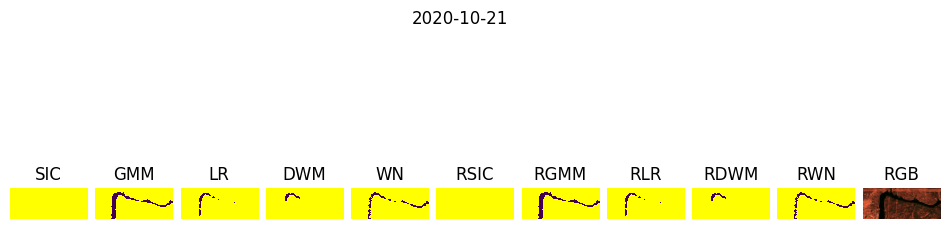

Image with index 1 from date 2020/10/26 (band 2)
Image with index 1 from date 2020/10/26 (band 3)
Image with index 1 from date 2020/10/26 (band 4)
Image with index 1 from date 2020/10/26 (band 8A)
Image with index 1 from date 2020/10/26 (band 8)
Image with index 1 from date 2020/10/26 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 12:08:44.909207: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 280ms/step
plotting results for image with index 1


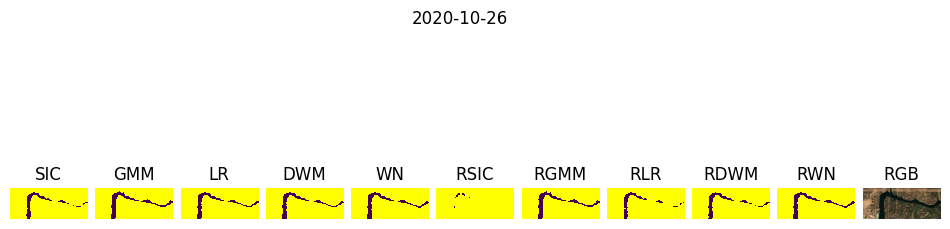

Image with index 2 from date 2020/11/05 (band 2)
Image with index 2 from date 2020/11/05 (band 3)
Image with index 2 from date 2020/11/05 (band 4)
Image with index 2 from date 2020/11/05 (band 8A)
Image with index 2 from date 2020/11/05 (band 8)
Image with index 2 from date 2020/11/05 (band 11)


2022-10-27 12:09:11.488814: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 276ms/step
plotting results for image with index 2


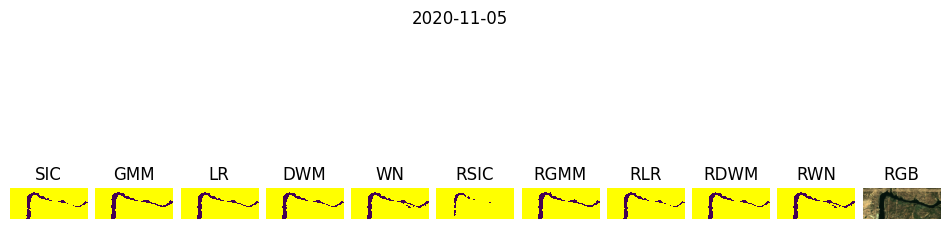

Image with index 3 from date 2020/11/10 (band 2)
Image with index 3 from date 2020/11/10 (band 3)
Image with index 3 from date 2020/11/10 (band 4)
Image with index 3 from date 2020/11/10 (band 8A)
Image with index 3 from date 2020/11/10 (band 8)
Image with index 3 from date 2020/11/10 (band 11)


2022-10-27 12:09:37.947110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 300ms/step
plotting results for image with index 3


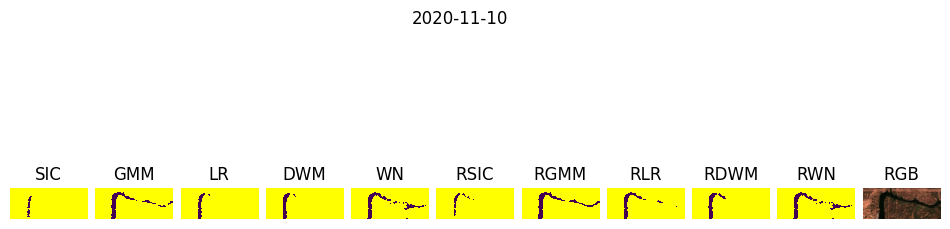

Image with index 4 from date 2020/11/20 (band 2)
Image with index 4 from date 2020/11/20 (band 3)
Image with index 4 from date 2020/11/20 (band 4)
Image with index 4 from date 2020/11/20 (band 8A)
Image with index 4 from date 2020/11/20 (band 8)
Image with index 4 from date 2020/11/20 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 12:10:04.457274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 283ms/step
plotting results for image with index 4


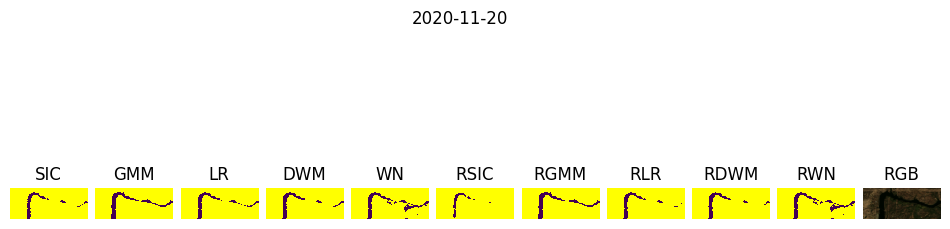

Image with index 5 from date 2020/11/25 (band 2)
Image with index 5 from date 2020/11/25 (band 3)
Image with index 5 from date 2020/11/25 (band 4)
Image with index 5 from date 2020/11/25 (band 8A)
Image with index 5 from date 2020/11/25 (band 8)
Image with index 5 from date 2020/11/25 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 12:10:31.998882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 281ms/step
plotting results for image with index 5


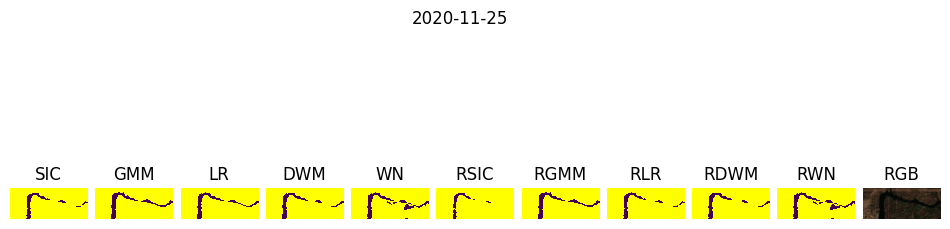

Image with index 6 from date 2020/11/30 (band 2)
Image with index 6 from date 2020/11/30 (band 3)
Image with index 6 from date 2020/11/30 (band 4)
Image with index 6 from date 2020/11/30 (band 8A)
Image with index 6 from date 2020/11/30 (band 8)
Image with index 6 from date 2020/11/30 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 12:10:57.873158: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 275ms/step
plotting results for image with index 6


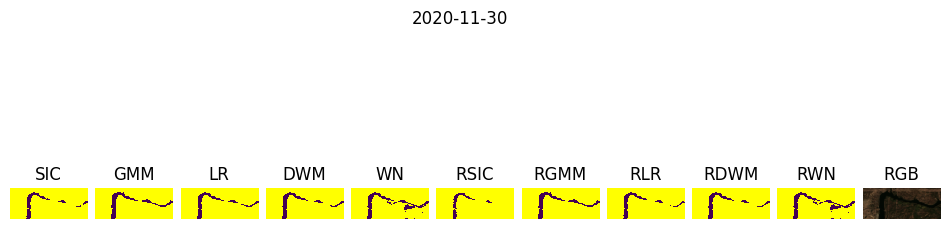

Image with index 7 from date 2020/12/05 (band 2)
Image with index 7 from date 2020/12/05 (band 3)
Image with index 7 from date 2020/12/05 (band 4)
Image with index 7 from date 2020/12/05 (band 8A)
Image with index 7 from date 2020/12/05 (band 8)
Image with index 7 from date 2020/12/05 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 12:11:23.715804: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 312ms/step
plotting results for image with index 7


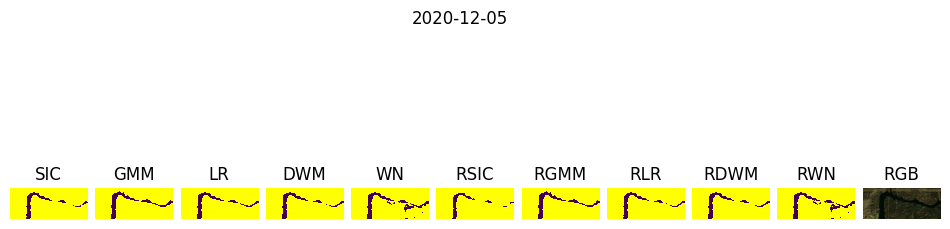

Image with index 8 from date 2020/12/10 (band 2)
Image with index 8 from date 2020/12/10 (band 3)
Image with index 8 from date 2020/12/10 (band 4)
Image with index 8 from date 2020/12/10 (band 8A)
Image with index 8 from date 2020/12/10 (band 8)
Image with index 8 from date 2020/12/10 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 12:11:49.877867: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 305ms/step
plotting results for image with index 8


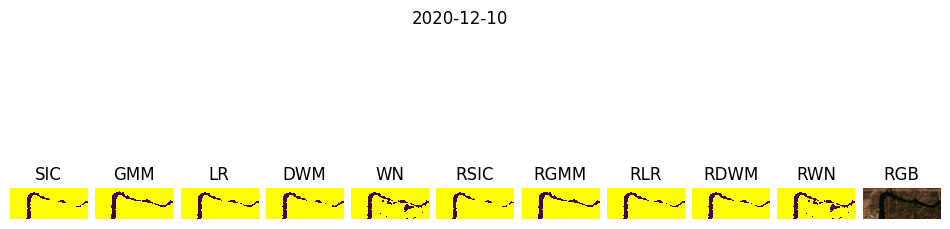

Image with index 9 from date 2020/12/30 (band 2)
Image with index 9 from date 2020/12/30 (band 3)
Image with index 9 from date 2020/12/30 (band 4)
Image with index 9 from date 2020/12/30 (band 8A)
Image with index 9 from date 2020/12/30 (band 8)
Image with index 9 from date 2020/12/30 (band 11)


2022-10-27 12:12:16.085456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 321ms/step
plotting results for image with index 9


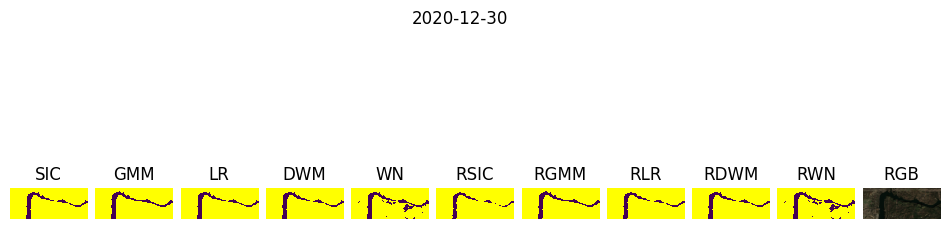

Image with index 10 from date 2021/01/09 (band 2)
Image with index 10 from date 2021/01/09 (band 3)
Image with index 10 from date 2021/01/09 (band 4)
Image with index 10 from date 2021/01/09 (band 8A)
Image with index 10 from date 2021/01/09 (band 8)
Image with index 10 from date 2021/01/09 (band 11)


2022-10-27 12:12:42.272286: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 301ms/step
plotting results for image with index 10


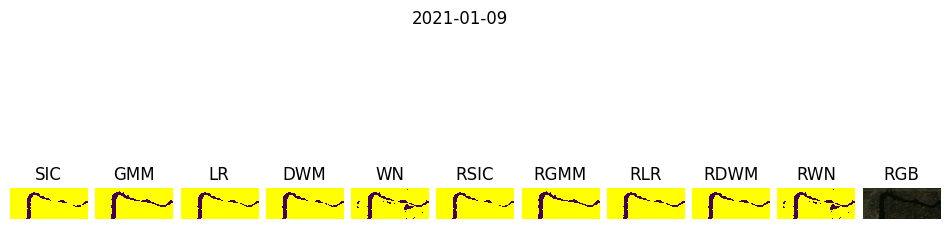

Image with index 11 from date 2021/01/14 (band 2)
Image with index 11 from date 2021/01/14 (band 3)
Image with index 11 from date 2021/01/14 (band 4)
Image with index 11 from date 2021/01/14 (band 8A)
Image with index 11 from date 2021/01/14 (band 8)
Image with index 11 from date 2021/01/14 (band 11)


2022-10-27 12:13:07.747571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 315ms/step
plotting results for image with index 11


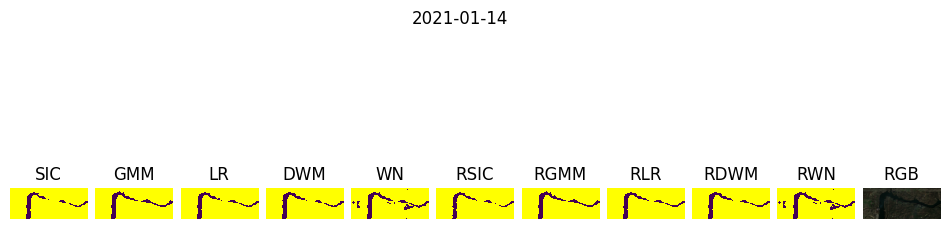

Image with index 12 from date 2021/01/19 (band 2)
Image with index 12 from date 2021/01/19 (band 3)
Image with index 12 from date 2021/01/19 (band 4)
Image with index 12 from date 2021/01/19 (band 8A)
Image with index 12 from date 2021/01/19 (band 8)
Image with index 12 from date 2021/01/19 (band 11)


2022-10-27 12:13:33.550278: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 304ms/step
plotting results for image with index 12


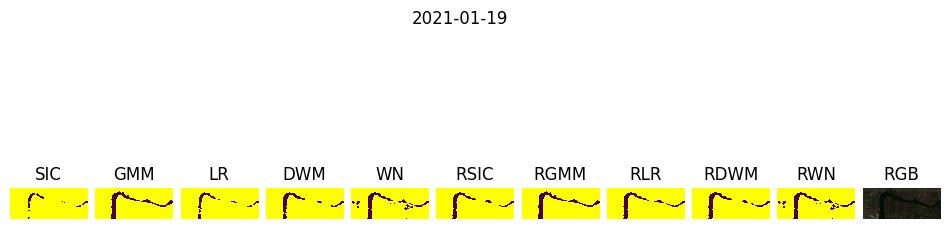

Image with index 13 from date 2021/02/23 (band 2)
Image with index 13 from date 2021/02/23 (band 3)
Image with index 13 from date 2021/02/23 (band 4)
Image with index 13 from date 2021/02/23 (band 8A)
Image with index 13 from date 2021/02/23 (band 8)
Image with index 13 from date 2021/02/23 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 12:13:59.487636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 286ms/step
plotting results for image with index 13


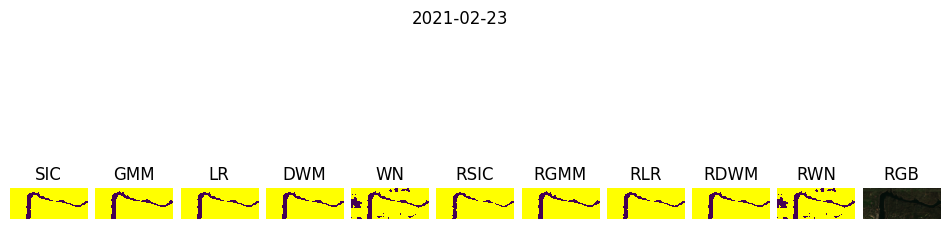

Image with index 14 from date 2021/02/28 (band 2)
Image with index 14 from date 2021/02/28 (band 3)
Image with index 14 from date 2021/02/28 (band 4)
Image with index 14 from date 2021/02/28 (band 8A)
Image with index 14 from date 2021/02/28 (band 8)
Image with index 14 from date 2021/02/28 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 12:14:25.391751: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 370ms/step
plotting results for image with index 14


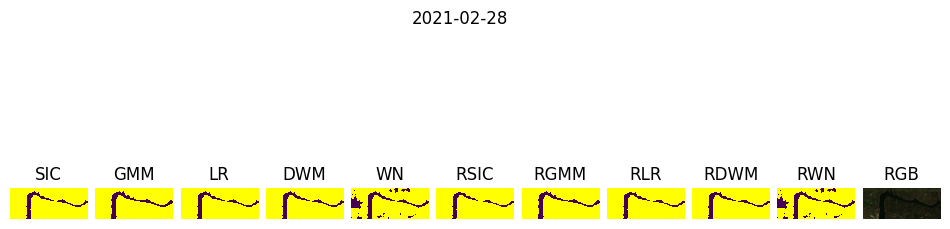

Image with index 15 from date 2021/03/05 (band 2)
Image with index 15 from date 2021/03/05 (band 3)
Image with index 15 from date 2021/03/05 (band 4)
Image with index 15 from date 2021/03/05 (band 8A)
Image with index 15 from date 2021/03/05 (band 8)
Image with index 15 from date 2021/03/05 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 12:14:51.570219: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 279ms/step
plotting results for image with index 15


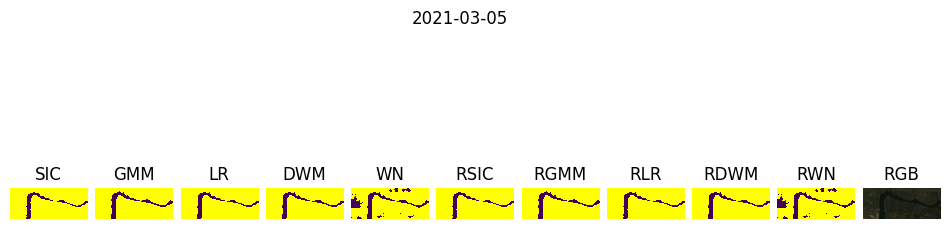

Image with index 16 from date 2021/03/30 (band 2)
Image with index 16 from date 2021/03/30 (band 3)
Image with index 16 from date 2021/03/30 (band 4)
Image with index 16 from date 2021/03/30 (band 8A)
Image with index 16 from date 2021/03/30 (band 8)
Image with index 16 from date 2021/03/30 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 12:15:17.453984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 328ms/step
plotting results for image with index 16


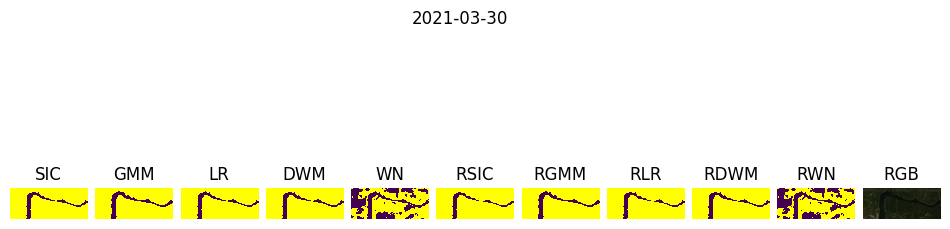

Image with index 17 from date 2021/04/09 (band 2)
Image with index 17 from date 2021/04/09 (band 3)
Image with index 17 from date 2021/04/09 (band 4)
Image with index 17 from date 2021/04/09 (band 8A)
Image with index 17 from date 2021/04/09 (band 8)
Image with index 17 from date 2021/04/09 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 12:15:43.282843: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 287ms/step
plotting results for image with index 17


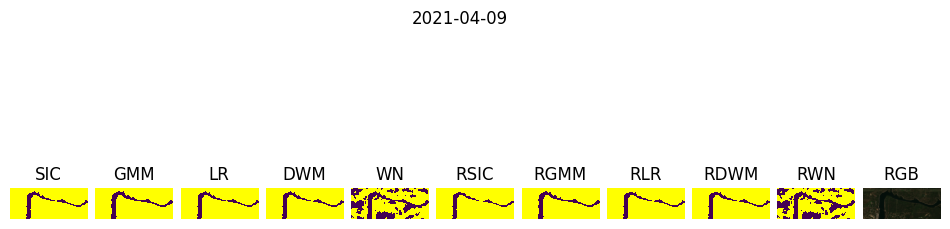

Image with index 18 from date 2021/04/19 (band 2)
Image with index 18 from date 2021/04/19 (band 3)
Image with index 18 from date 2021/04/19 (band 4)
Image with index 18 from date 2021/04/19 (band 8A)
Image with index 18 from date 2021/04/19 (band 8)
Image with index 18 from date 2021/04/19 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 12:16:09.364042: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 305ms/step
plotting results for image with index 18


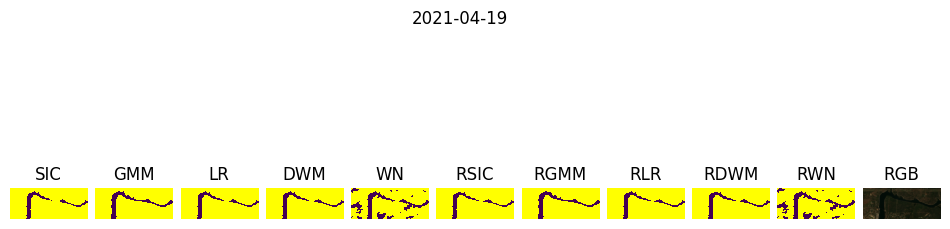

Image with index 19 from date 2021/05/04 (band 2)
Image with index 19 from date 2021/05/04 (band 3)
Image with index 19 from date 2021/05/04 (band 4)
Image with index 19 from date 2021/05/04 (band 8A)
Image with index 19 from date 2021/05/04 (band 8)
Image with index 19 from date 2021/05/04 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 12:16:35.110282: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 326ms/step
plotting results for image with index 19


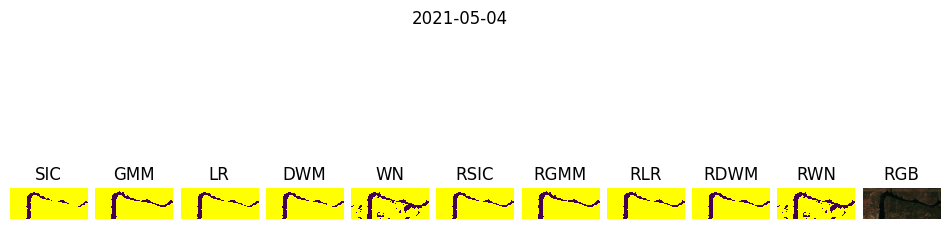

Image with index 20 from date 2021/05/14 (band 2)
Image with index 20 from date 2021/05/14 (band 3)
Image with index 20 from date 2021/05/14 (band 4)
Image with index 20 from date 2021/05/14 (band 8A)
Image with index 20 from date 2021/05/14 (band 8)
Image with index 20 from date 2021/05/14 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 12:17:01.094245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 352ms/step
plotting results for image with index 20


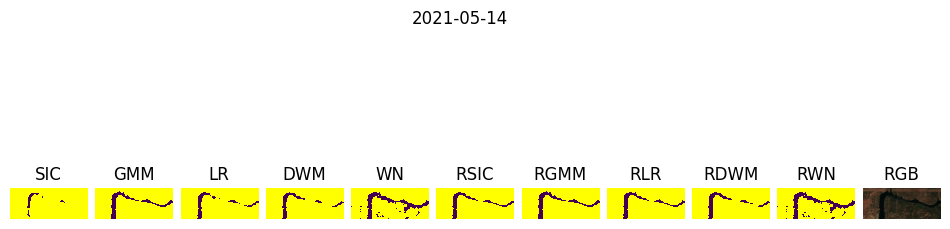

Image with index 21 from date 2021/05/19 (band 2)
Image with index 21 from date 2021/05/19 (band 3)
Image with index 21 from date 2021/05/19 (band 4)
Image with index 21 from date 2021/05/19 (band 8A)
Image with index 21 from date 2021/05/19 (band 8)
Image with index 21 from date 2021/05/19 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 12:17:27.871899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 381ms/step
plotting results for image with index 21


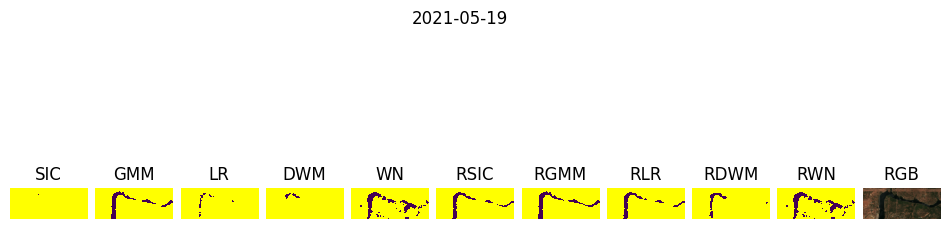

Image with index 22 from date 2021/05/29 (band 2)
Image with index 22 from date 2021/05/29 (band 3)
Image with index 22 from date 2021/05/29 (band 4)
Image with index 22 from date 2021/05/29 (band 8A)
Image with index 22 from date 2021/05/29 (band 8)
Image with index 22 from date 2021/05/29 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 12:17:55.175582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 316ms/step
plotting results for image with index 22


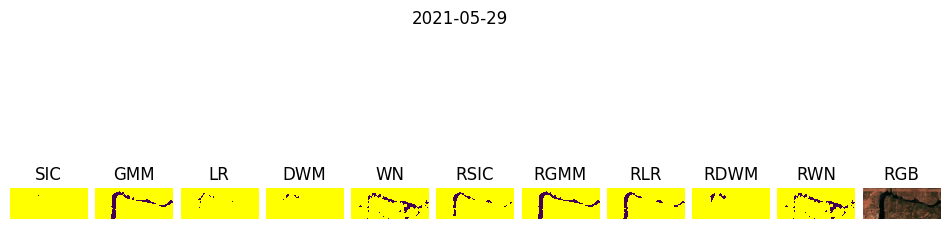

Image with index 23 from date 2021/06/03 (band 2)
Image with index 23 from date 2021/06/03 (band 3)
Image with index 23 from date 2021/06/03 (band 4)
Image with index 23 from date 2021/06/03 (band 8A)
Image with index 23 from date 2021/06/03 (band 8)
Image with index 23 from date 2021/06/03 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 12:18:21.381126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 325ms/step
plotting results for image with index 23


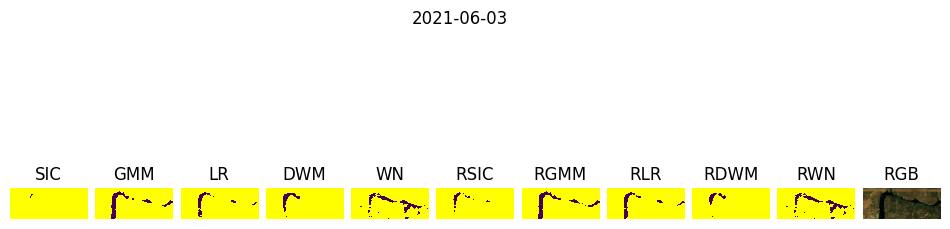

Image with index 24 from date 2021/06/08 (band 2)
Image with index 24 from date 2021/06/08 (band 3)
Image with index 24 from date 2021/06/08 (band 4)
Image with index 24 from date 2021/06/08 (band 8A)
Image with index 24 from date 2021/06/08 (band 8)
Image with index 24 from date 2021/06/08 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 12:18:47.212197: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 292ms/step
plotting results for image with index 24


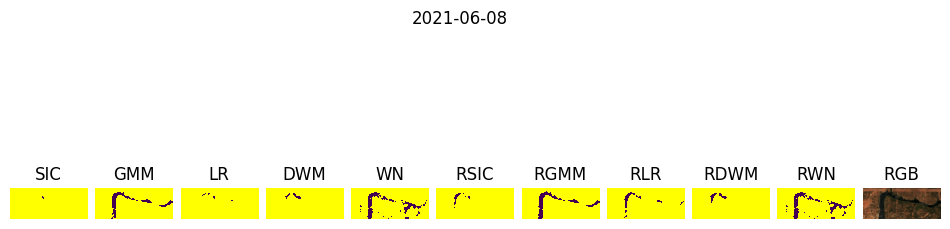

Image with index 25 from date 2021/06/13 (band 2)
Image with index 25 from date 2021/06/13 (band 3)
Image with index 25 from date 2021/06/13 (band 4)
Image with index 25 from date 2021/06/13 (band 8A)
Image with index 25 from date 2021/06/13 (band 8)
Image with index 25 from date 2021/06/13 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 12:19:13.270438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 299ms/step
plotting results for image with index 25


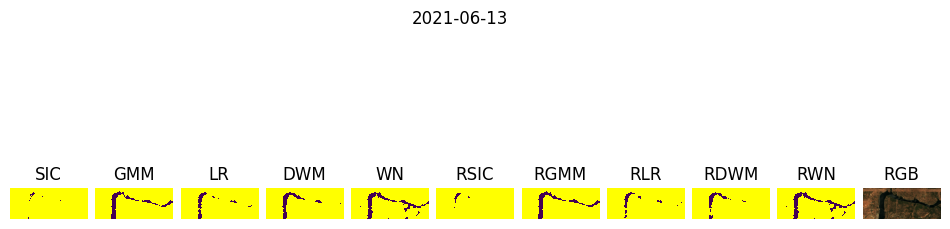

Image with index 26 from date 2021/06/18 (band 2)
Image with index 26 from date 2021/06/18 (band 3)
Image with index 26 from date 2021/06/18 (band 4)
Image with index 26 from date 2021/06/18 (band 8A)
Image with index 26 from date 2021/06/18 (band 8)
Image with index 26 from date 2021/06/18 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 12:19:39.454150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 298ms/step
plotting results for image with index 26


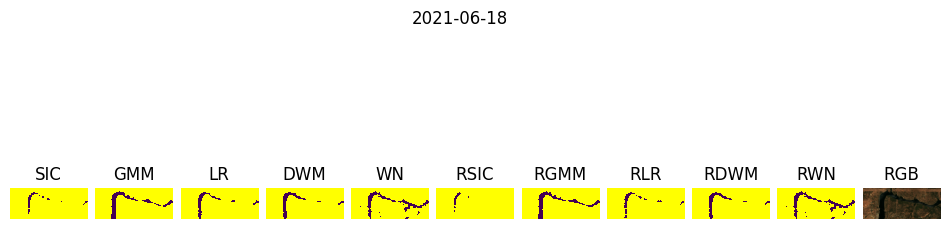

Image with index 27 from date 2021/06/23 (band 2)
Image with index 27 from date 2021/06/23 (band 3)
Image with index 27 from date 2021/06/23 (band 4)
Image with index 27 from date 2021/06/23 (band 8A)
Image with index 27 from date 2021/06/23 (band 8)
Image with index 27 from date 2021/06/23 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 12:20:05.617101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 313ms/step
plotting results for image with index 27


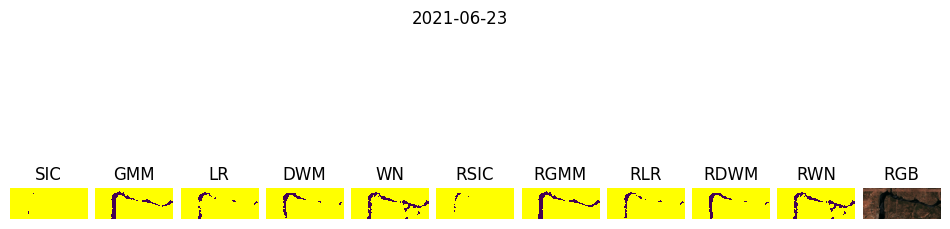

Image with index 28 from date 2021/06/28 (band 2)
Image with index 28 from date 2021/06/28 (band 3)
Image with index 28 from date 2021/06/28 (band 4)
Image with index 28 from date 2021/06/28 (band 8A)
Image with index 28 from date 2021/06/28 (band 8)
Image with index 28 from date 2021/06/28 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 12:20:34.051753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 316ms/step
plotting results for image with index 28


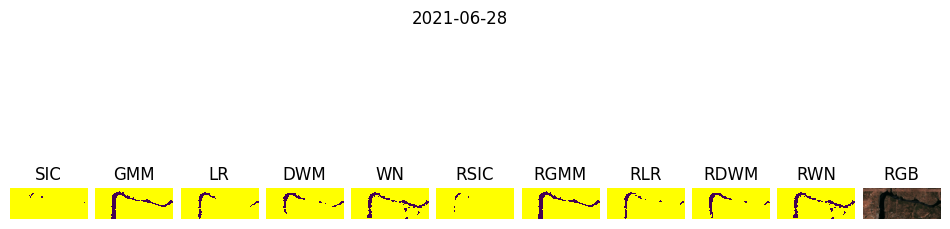

Image with index 29 from date 2021/07/08 (band 2)
Image with index 29 from date 2021/07/08 (band 3)
Image with index 29 from date 2021/07/08 (band 4)
Image with index 29 from date 2021/07/08 (band 8A)
Image with index 29 from date 2021/07/08 (band 8)
Image with index 29 from date 2021/07/08 (band 11)


2022-10-27 12:21:00.441112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 334ms/step
plotting results for image with index 29


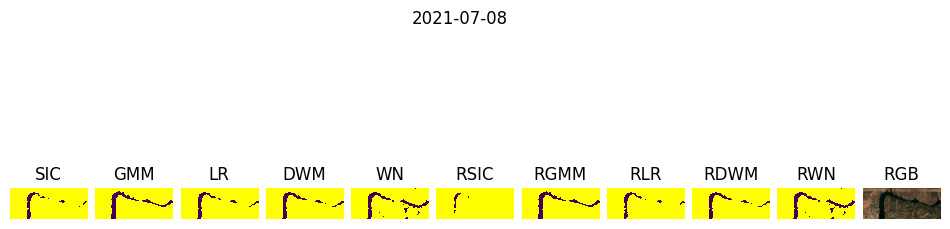

Image with index 30 from date 2021/07/13 (band 2)
Image with index 30 from date 2021/07/13 (band 3)
Image with index 30 from date 2021/07/13 (band 4)
Image with index 30 from date 2021/07/13 (band 8A)
Image with index 30 from date 2021/07/13 (band 8)
Image with index 30 from date 2021/07/13 (band 11)


2022-10-27 12:21:26.801784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 292ms/step
plotting results for image with index 30


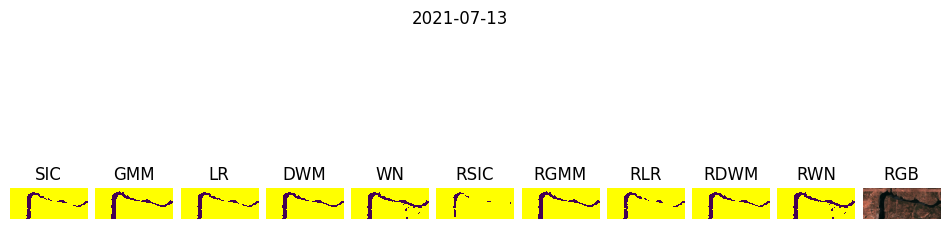

Image with index 31 from date 2021/07/18 (band 2)
Image with index 31 from date 2021/07/18 (band 3)
Image with index 31 from date 2021/07/18 (band 4)
Image with index 31 from date 2021/07/18 (band 8A)
Image with index 31 from date 2021/07/18 (band 8)
Image with index 31 from date 2021/07/18 (band 11)


2022-10-27 12:21:53.057657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 299ms/step
plotting results for image with index 31


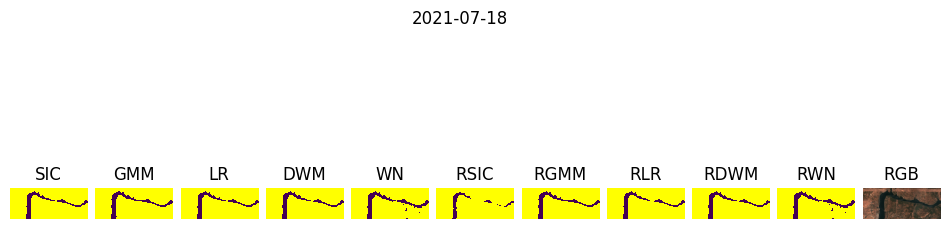

Image with index 32 from date 2021/07/23 (band 2)
Image with index 32 from date 2021/07/23 (band 3)
Image with index 32 from date 2021/07/23 (band 4)
Image with index 32 from date 2021/07/23 (band 8A)
Image with index 32 from date 2021/07/23 (band 8)
Image with index 32 from date 2021/07/23 (band 11)


2022-10-27 12:22:19.432469: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 331ms/step
plotting results for image with index 32


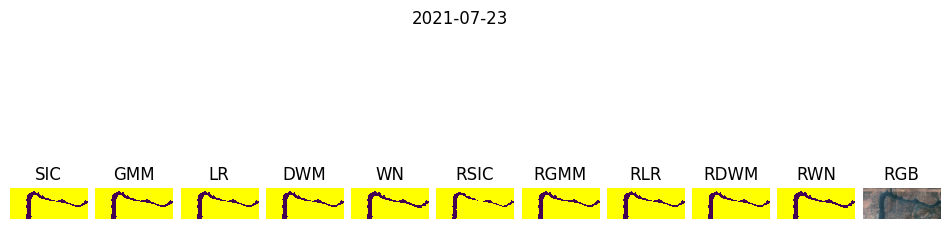

Image with index 33 from date 2021/08/02 (band 2)
Image with index 33 from date 2021/08/02 (band 3)
Image with index 33 from date 2021/08/02 (band 4)
Image with index 33 from date 2021/08/02 (band 8A)
Image with index 33 from date 2021/08/02 (band 8)
Image with index 33 from date 2021/08/02 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 12:22:45.626068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 322ms/step
plotting results for image with index 33


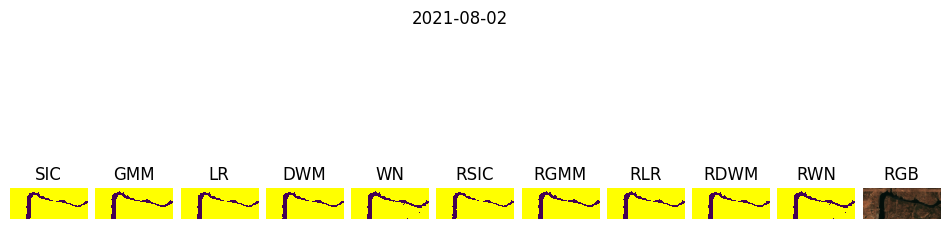

Image with index 34 from date 2021/08/22 (band 2)
Image with index 34 from date 2021/08/22 (band 3)
Image with index 34 from date 2021/08/22 (band 4)
Image with index 34 from date 2021/08/22 (band 8A)
Image with index 34 from date 2021/08/22 (band 8)
Image with index 34 from date 2021/08/22 (band 11)


2022-10-27 12:23:12.612756: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 310ms/step
plotting results for image with index 34


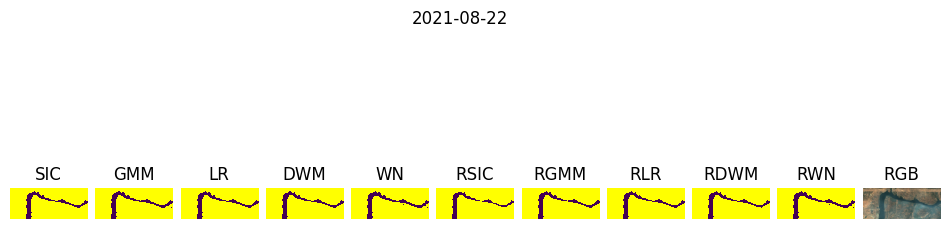

Image with index 35 from date 2021/08/27 (band 2)
Image with index 35 from date 2021/08/27 (band 3)
Image with index 35 from date 2021/08/27 (band 4)
Image with index 35 from date 2021/08/27 (band 8A)
Image with index 35 from date 2021/08/27 (band 8)
Image with index 35 from date 2021/08/27 (band 11)


2022-10-27 12:23:38.897792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 349ms/step
plotting results for image with index 35


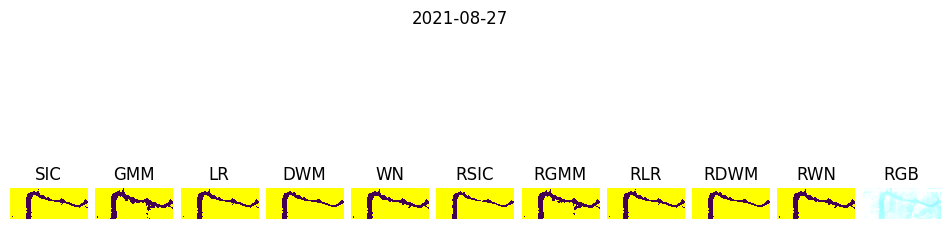

Image with index 36 from date 2021/09/01 (band 2)
Image with index 36 from date 2021/09/01 (band 3)
Image with index 36 from date 2021/09/01 (band 4)
Image with index 36 from date 2021/09/01 (band 8A)
Image with index 36 from date 2021/09/01 (band 8)
Image with index 36 from date 2021/09/01 (band 11)


2022-10-27 12:24:05.849783: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 376ms/step
plotting results for image with index 36


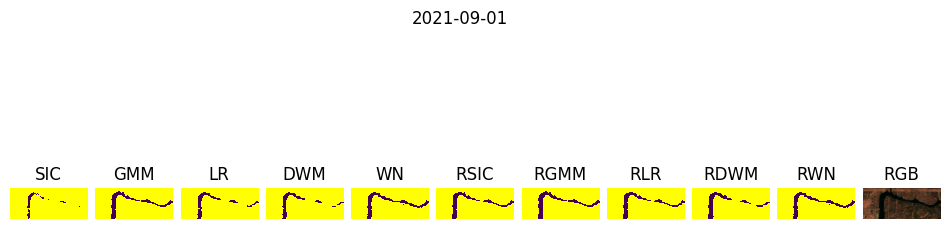

Image with index 37 from date 2021/09/06 (band 2)
Image with index 37 from date 2021/09/06 (band 3)
Image with index 37 from date 2021/09/06 (band 4)
Image with index 37 from date 2021/09/06 (band 8A)
Image with index 37 from date 2021/09/06 (band 8)
Image with index 37 from date 2021/09/06 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 12:24:32.510454: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 300ms/step
plotting results for image with index 37


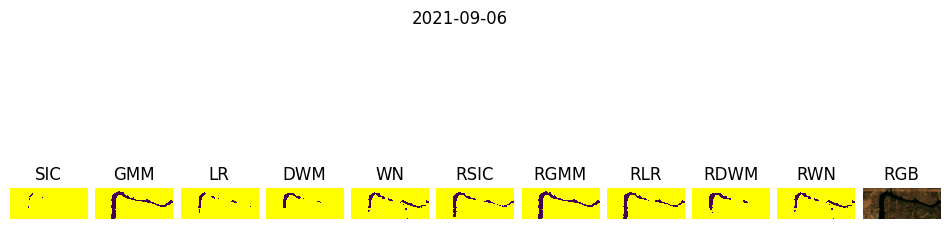

Image with index 38 from date 2021/09/11 (band 2)
Image with index 38 from date 2021/09/11 (band 3)
Image with index 38 from date 2021/09/11 (band 4)
Image with index 38 from date 2021/09/11 (band 8A)
Image with index 38 from date 2021/09/11 (band 8)
Image with index 38 from date 2021/09/11 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 12:24:59.748653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 374ms/step
plotting results for image with index 38


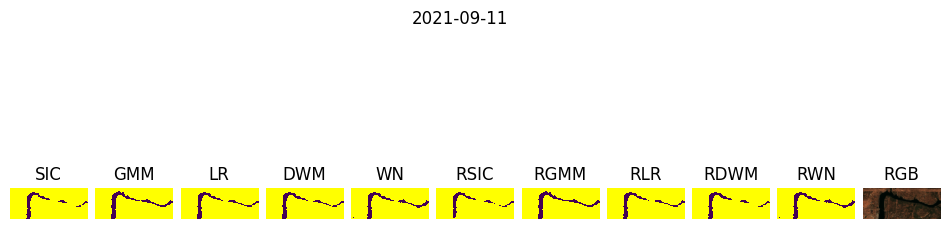

Image with index 39 from date 2021/09/16 (band 2)
Image with index 39 from date 2021/09/16 (band 3)
Image with index 39 from date 2021/09/16 (band 4)
Image with index 39 from date 2021/09/16 (band 8A)
Image with index 39 from date 2021/09/16 (band 8)
Image with index 39 from date 2021/09/16 (band 11)


2022-10-27 12:25:27.065593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 349ms/step
plotting results for image with index 39


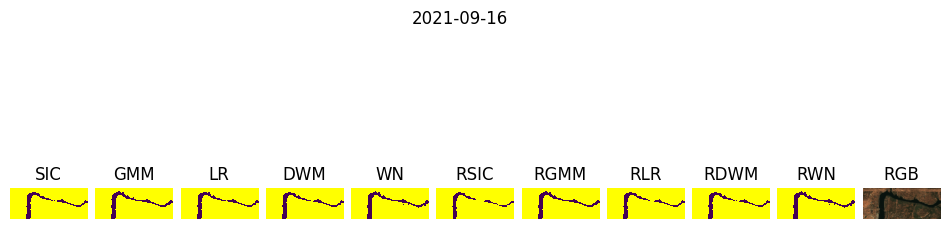

Image with index 40 from date 2021/09/21 (band 2)
Image with index 40 from date 2021/09/21 (band 3)
Image with index 40 from date 2021/09/21 (band 4)
Image with index 40 from date 2021/09/21 (band 8A)
Image with index 40 from date 2021/09/21 (band 8)
Image with index 40 from date 2021/09/21 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 12:25:54.097685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 361ms/step
plotting results for image with index 40


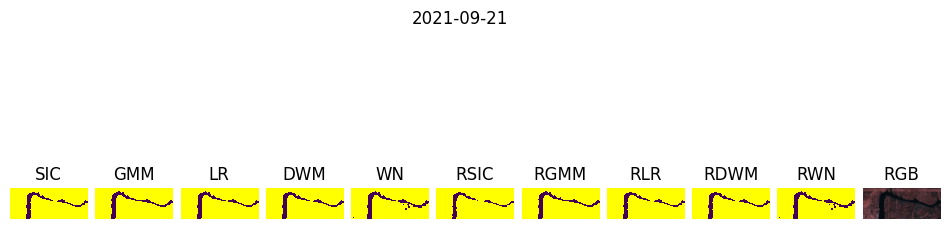

Image with index 41 from date 2021/09/26 (band 2)
Image with index 41 from date 2021/09/26 (band 3)
Image with index 41 from date 2021/09/26 (band 4)
Image with index 41 from date 2021/09/26 (band 8A)
Image with index 41 from date 2021/09/26 (band 8)
Image with index 41 from date 2021/09/26 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 12:26:22.076858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 410ms/step
plotting results for image with index 41


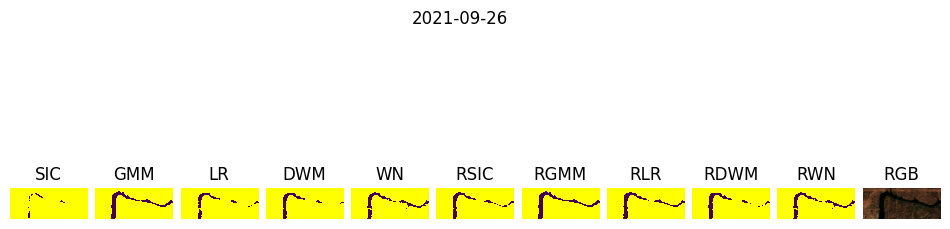

In [6]:
# Evaluation Stage
# scene_id = 1 for scene A in Oroville Dam (water stream)
Config.scene_id = 1
print(Config.eps)
print(Config.transition_matrix[Config.scenario])

# This stage includes the plotting of results
evaluation_main(gmm_densities, trained_lr_model, image_reader)

### Evaluation (Study Area B)

0.6
{'oroville_dam': array([[0.4, 0.6],
       [0.6, 0.4]]), 'charles_river': array([[0.4, 0.6, 0.6],
       [0.6, 0.4, 0.6],
       [0.6, 0.6, 0.4]])}
model name GMM and transition probability matrix is [[0.4 0.6]
 [0.6 0.4]]
model name Scaled Index and transition probability matrix is [[0.4 0.6]
 [0.6 0.4]]
model name Logistic Regression and transition probability matrix is [[0.4 0.6]
 [0.6 0.4]]
model name DeepWaterMap and transition probability matrix is [[0.4 0.6]
 [0.6 0.4]]
model name WatNet and transition probability matrix is [[0.4 0.6]
 [0.6 0.4]]
Image with index 0 from date 2020/10/21 (band 2)
Image with index 0 from date 2020/10/21 (band 3)
Image with index 0 from date 2020/10/21 (band 4)
Image with index 0 from date 2020/10/21 (band 8A)
Image with index 0 from date 2020/10/21 (band 8)
Image with index 0 from date 2020/10/21 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


Metal device set to: Apple M1 Pro


2022-10-27 11:28:06.594689: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-27 11:28:06.594799: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2022-10-27 11:28:07.643138: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-27 11:28:07.726774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 347ms/step
plotting results for image with index 0
Saving sensitivity results
{'GMM': 9988, 'LR': 9530, 'SIC': 9458, 'RGMM': 9988, 'RLR': 9530, 'RSIC': 9458}


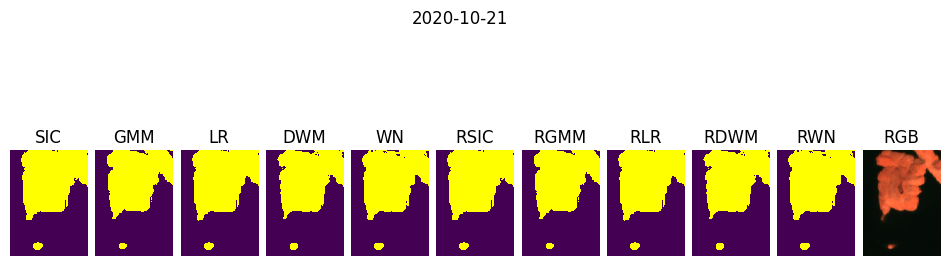

Image with index 1 from date 2020/10/26 (band 2)
Image with index 1 from date 2020/10/26 (band 3)
Image with index 1 from date 2020/10/26 (band 4)
Image with index 1 from date 2020/10/26 (band 8A)
Image with index 1 from date 2020/10/26 (band 8)
Image with index 1 from date 2020/10/26 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 11:28:27.384541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 278ms/step
plotting results for image with index 1
Saving sensitivity results
{'GMM': 9633, 'LR': 9175, 'SIC': 8990, 'RGMM': 9618, 'RLR': 9125, 'RSIC': 8791}


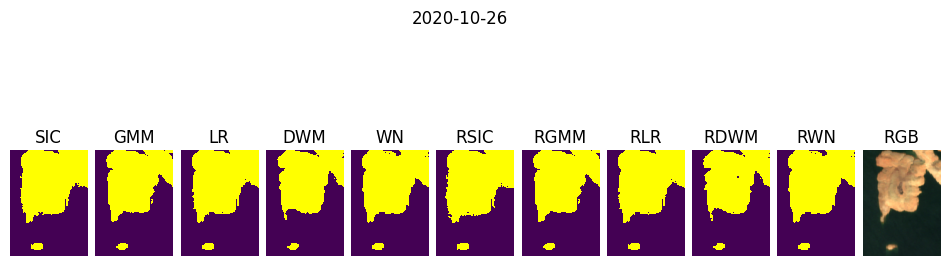

Image with index 2 from date 2020/11/05 (band 2)
Image with index 2 from date 2020/11/05 (band 3)
Image with index 2 from date 2020/11/05 (band 4)
Image with index 2 from date 2020/11/05 (band 8A)
Image with index 2 from date 2020/11/05 (band 8)
Image with index 2 from date 2020/11/05 (band 11)


2022-10-27 11:28:45.689320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 275ms/step
plotting results for image with index 2
Saving sensitivity results
{'GMM': 9287, 'LR': 8912, 'SIC': 8831, 'RGMM': 9254, 'RLR': 8903, 'RSIC': 8828}


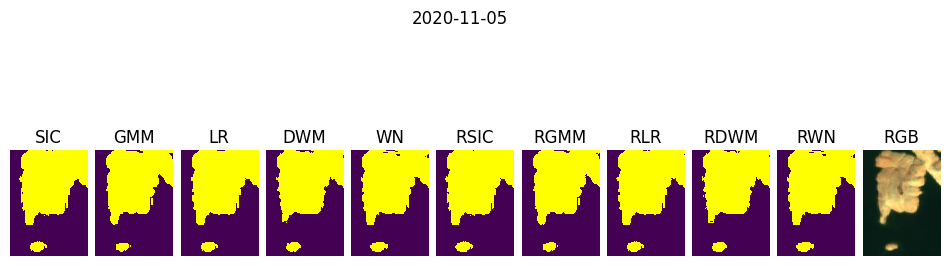

Image with index 3 from date 2020/11/10 (band 2)
Image with index 3 from date 2020/11/10 (band 3)
Image with index 3 from date 2020/11/10 (band 4)
Image with index 3 from date 2020/11/10 (band 8A)
Image with index 3 from date 2020/11/10 (band 8)
Image with index 3 from date 2020/11/10 (band 11)


2022-10-27 11:29:04.289058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 283ms/step
plotting results for image with index 3
Saving sensitivity results
{'GMM': 8930, 'LR': 7812, 'SIC': 7525, 'RGMM': 8892, 'RLR': 7584, 'RSIC': 6738}


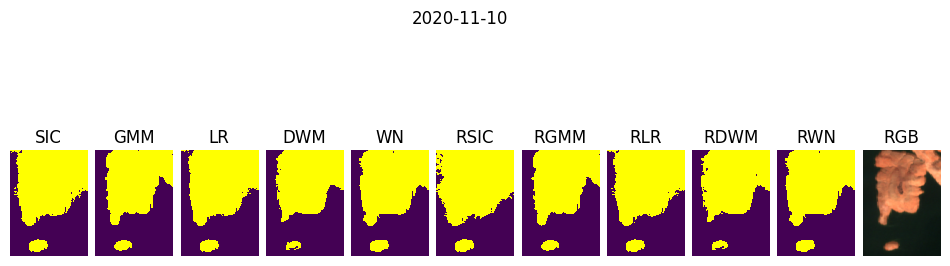

Image with index 4 from date 2020/11/20 (band 2)
Image with index 4 from date 2020/11/20 (band 3)
Image with index 4 from date 2020/11/20 (band 4)
Image with index 4 from date 2020/11/20 (band 8A)
Image with index 4 from date 2020/11/20 (band 8)
Image with index 4 from date 2020/11/20 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 11:29:23.647883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 281ms/step
plotting results for image with index 4
Saving sensitivity results
{'GMM': 8707, 'LR': 8169, 'SIC': 8135, 'RGMM': 8694, 'RLR': 8181, 'RSIC': 8157}


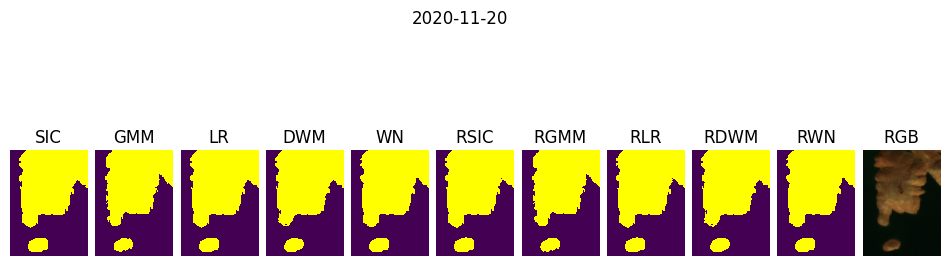

Image with index 5 from date 2020/11/25 (band 2)
Image with index 5 from date 2020/11/25 (band 3)
Image with index 5 from date 2020/11/25 (band 4)
Image with index 5 from date 2020/11/25 (band 8A)
Image with index 5 from date 2020/11/25 (band 8)
Image with index 5 from date 2020/11/25 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 11:29:42.644507: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 293ms/step
plotting results for image with index 5
Saving sensitivity results
{'GMM': 8257, 'LR': 7950, 'SIC': 7884, 'RGMM': 8223, 'RLR': 7938, 'RSIC': 7843}


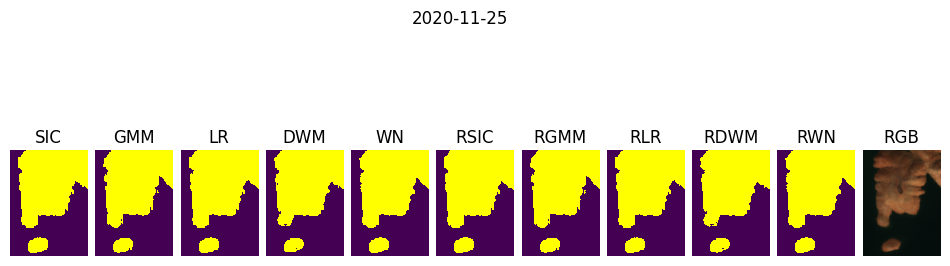

Image with index 6 from date 2020/11/30 (band 2)
Image with index 6 from date 2020/11/30 (band 3)
Image with index 6 from date 2020/11/30 (band 4)
Image with index 6 from date 2020/11/30 (band 8A)
Image with index 6 from date 2020/11/30 (band 8)
Image with index 6 from date 2020/11/30 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 11:30:01.929255: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 296ms/step
plotting results for image with index 6
Saving sensitivity results
{'GMM': 8175, 'LR': 7714, 'SIC': 7662, 'RGMM': 8186, 'RLR': 7684, 'RSIC': 7633}


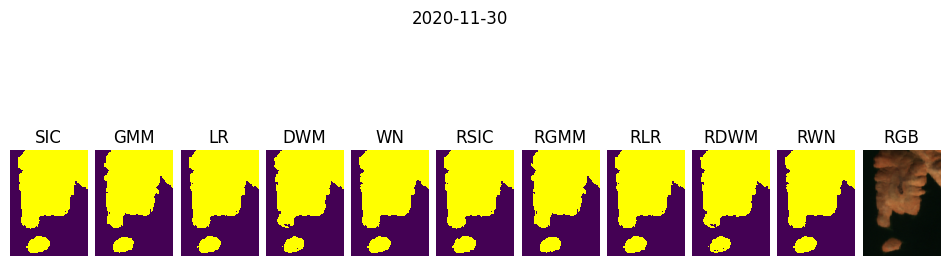

Image with index 7 from date 2020/12/05 (band 2)
Image with index 7 from date 2020/12/05 (band 3)
Image with index 7 from date 2020/12/05 (band 4)
Image with index 7 from date 2020/12/05 (band 8A)
Image with index 7 from date 2020/12/05 (band 8)
Image with index 7 from date 2020/12/05 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 11:30:21.428938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 342ms/step
plotting results for image with index 7
Saving sensitivity results
{'GMM': 7873, 'LR': 7492, 'SIC': 7380, 'RGMM': 7848, 'RLR': 7470, 'RSIC': 7342}


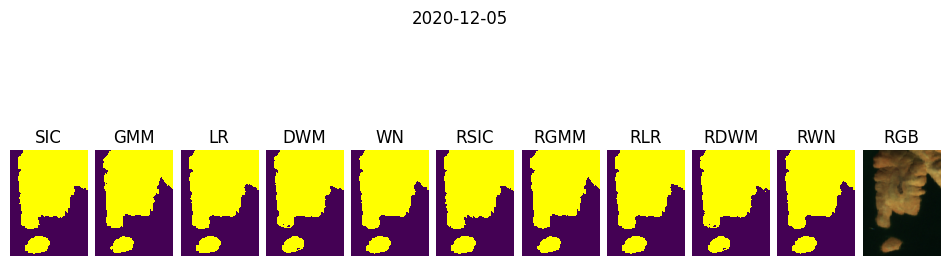

Image with index 8 from date 2020/12/10 (band 2)
Image with index 8 from date 2020/12/10 (band 3)
Image with index 8 from date 2020/12/10 (band 4)
Image with index 8 from date 2020/12/10 (band 8A)
Image with index 8 from date 2020/12/10 (band 8)
Image with index 8 from date 2020/12/10 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 11:30:40.809213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 316ms/step
plotting results for image with index 8
Saving sensitivity results
{'GMM': 7825, 'LR': 7298, 'SIC': 7232, 'RGMM': 7816, 'RLR': 7277, 'RSIC': 7212}


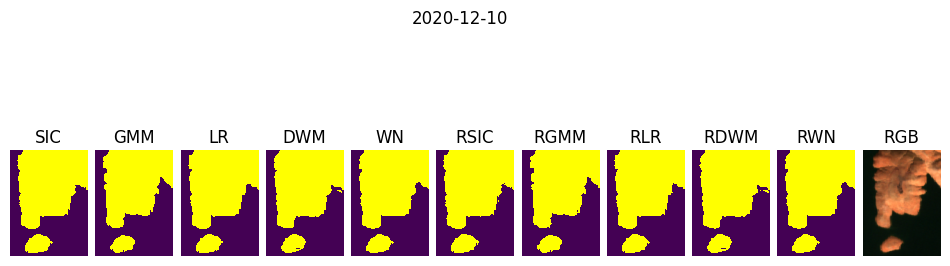

Image with index 9 from date 2020/12/30 (band 2)
Image with index 9 from date 2020/12/30 (band 3)
Image with index 9 from date 2020/12/30 (band 4)
Image with index 9 from date 2020/12/30 (band 8A)
Image with index 9 from date 2020/12/30 (band 8)
Image with index 9 from date 2020/12/30 (band 11)


2022-10-27 11:30:59.824990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 343ms/step
plotting results for image with index 9
Saving sensitivity results
{'GMM': 7019, 'LR': 5220, 'SIC': 4964, 'RGMM': 6957, 'RLR': 5041, 'RSIC': 4492}


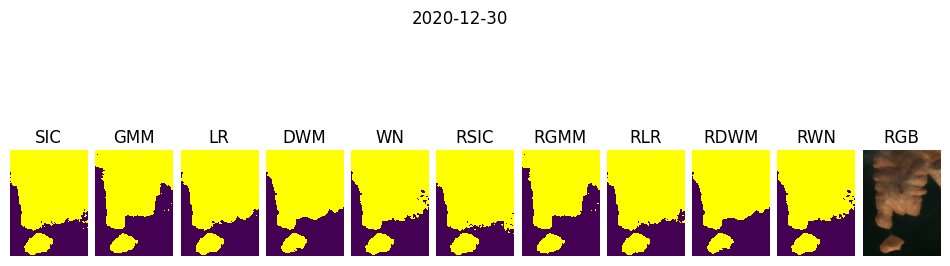

Image with index 10 from date 2021/01/09 (band 2)
Image with index 10 from date 2021/01/09 (band 3)
Image with index 10 from date 2021/01/09 (band 4)
Image with index 10 from date 2021/01/09 (band 8A)
Image with index 10 from date 2021/01/09 (band 8)
Image with index 10 from date 2021/01/09 (band 11)


2022-10-27 11:31:18.581358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 338ms/step
plotting results for image with index 10
Saving sensitivity results
{'GMM': 7661, 'LR': 7086, 'SIC': 7049, 'RGMM': 7678, 'RLR': 7119, 'RSIC': 7113}


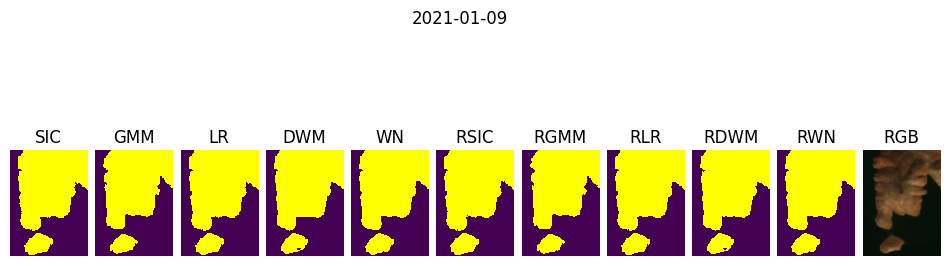

Image with index 11 from date 2021/01/14 (band 2)
Image with index 11 from date 2021/01/14 (band 3)
Image with index 11 from date 2021/01/14 (band 4)
Image with index 11 from date 2021/01/14 (band 8A)
Image with index 11 from date 2021/01/14 (band 8)
Image with index 11 from date 2021/01/14 (band 11)


2022-10-27 11:31:37.063990: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 310ms/step
plotting results for image with index 11
Saving sensitivity results
{'GMM': 7351, 'LR': 6913, 'SIC': 6797, 'RGMM': 7332, 'RLR': 6880, 'RSIC': 6711}


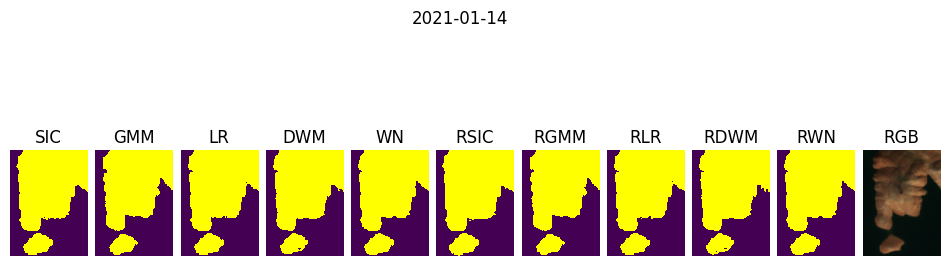

Image with index 12 from date 2021/01/19 (band 2)
Image with index 12 from date 2021/01/19 (band 3)
Image with index 12 from date 2021/01/19 (band 4)
Image with index 12 from date 2021/01/19 (band 8A)
Image with index 12 from date 2021/01/19 (band 8)
Image with index 12 from date 2021/01/19 (band 11)


2022-10-27 11:31:56.298346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 316ms/step
plotting results for image with index 12
Saving sensitivity results
{'GMM': 7302, 'LR': 5506, 'SIC': 5260, 'RGMM': 7296, 'RLR': 5170, 'RSIC': 4628}


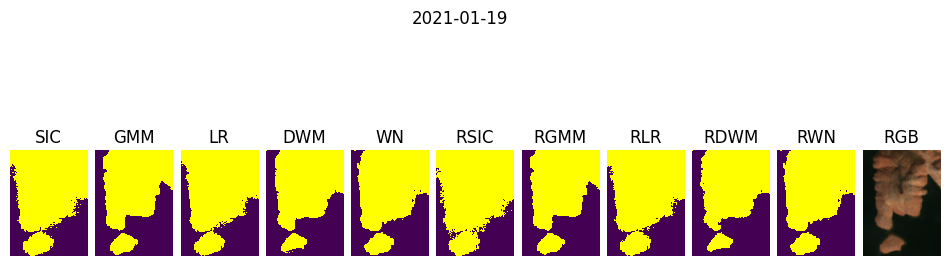

Image with index 13 from date 2021/02/23 (band 2)
Image with index 13 from date 2021/02/23 (band 3)
Image with index 13 from date 2021/02/23 (band 4)
Image with index 13 from date 2021/02/23 (band 8A)
Image with index 13 from date 2021/02/23 (band 8)
Image with index 13 from date 2021/02/23 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 11:32:15.229211: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 319ms/step
plotting results for image with index 13
Saving sensitivity results
{'GMM': 8312, 'LR': 7967, 'SIC': 7935, 'RGMM': 8349, 'RLR': 7989, 'RSIC': 8014}


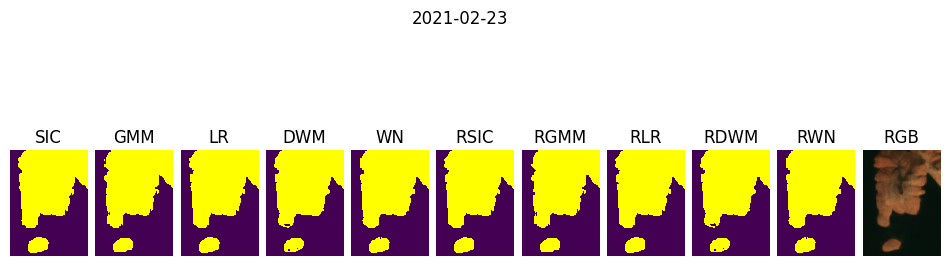

Image with index 14 from date 2021/02/28 (band 2)
Image with index 14 from date 2021/02/28 (band 3)
Image with index 14 from date 2021/02/28 (band 4)
Image with index 14 from date 2021/02/28 (band 8A)
Image with index 14 from date 2021/02/28 (band 8)
Image with index 14 from date 2021/02/28 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 11:32:33.973236: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 363ms/step
plotting results for image with index 14
Saving sensitivity results
{'GMM': 8472, 'LR': 7992, 'SIC': 7965, 'RGMM': 8483, 'RLR': 8008, 'RSIC': 7967}


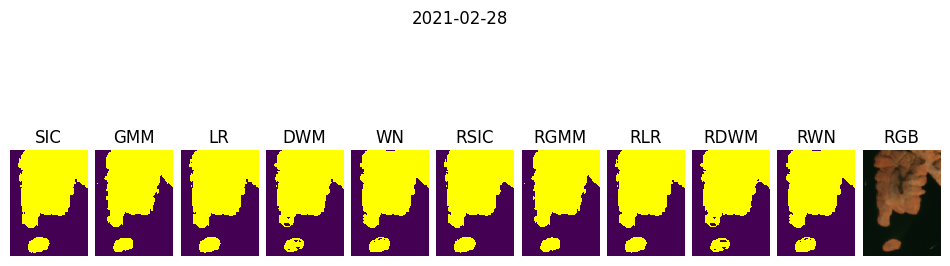

Image with index 15 from date 2021/03/05 (band 2)
Image with index 15 from date 2021/03/05 (band 3)
Image with index 15 from date 2021/03/05 (band 4)
Image with index 15 from date 2021/03/05 (band 8A)
Image with index 15 from date 2021/03/05 (band 8)
Image with index 15 from date 2021/03/05 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 11:32:53.484136: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 373ms/step
plotting results for image with index 15
Saving sensitivity results
{'GMM': 8230, 'LR': 7793, 'SIC': 7694, 'RGMM': 8212, 'RLR': 7767, 'RSIC': 7495}


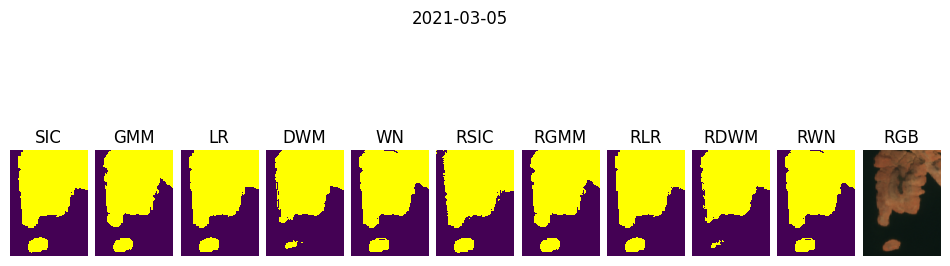

Image with index 16 from date 2021/03/30 (band 2)
Image with index 16 from date 2021/03/30 (band 3)
Image with index 16 from date 2021/03/30 (band 4)
Image with index 16 from date 2021/03/30 (band 8A)
Image with index 16 from date 2021/03/30 (band 8)
Image with index 16 from date 2021/03/30 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 11:33:12.395419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 290ms/step
plotting results for image with index 16
Saving sensitivity results
{'GMM': 9089, 'LR': 8642, 'SIC': 8616, 'RGMM': 9114, 'RLR': 8683, 'RSIC': 8736}


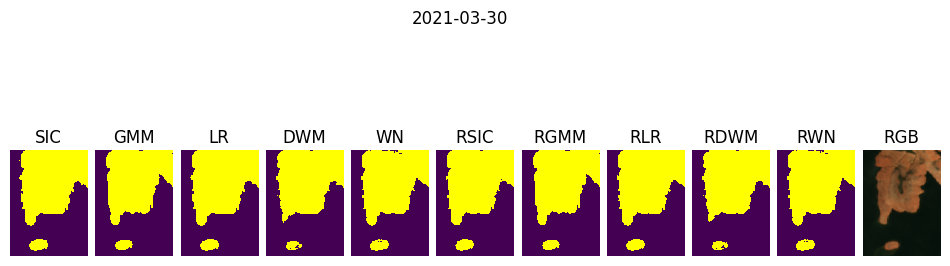

Image with index 17 from date 2021/04/09 (band 2)
Image with index 17 from date 2021/04/09 (band 3)
Image with index 17 from date 2021/04/09 (band 4)
Image with index 17 from date 2021/04/09 (band 8A)
Image with index 17 from date 2021/04/09 (band 8)
Image with index 17 from date 2021/04/09 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 11:33:31.201429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 322ms/step
plotting results for image with index 17
Saving sensitivity results
{'GMM': 9331, 'LR': 8964, 'SIC': 8932, 'RGMM': 9354, 'RLR': 8983, 'RSIC': 8958}


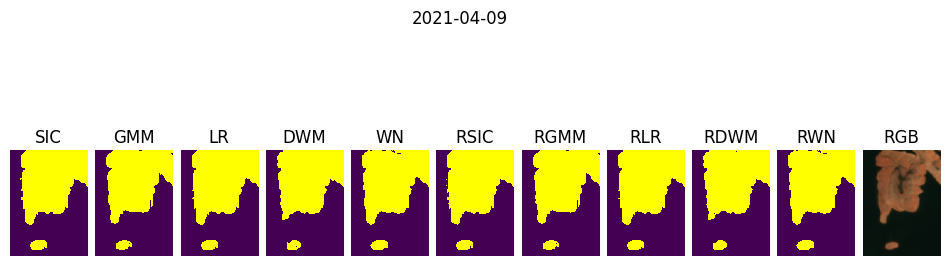

Image with index 18 from date 2021/04/19 (band 2)
Image with index 18 from date 2021/04/19 (band 3)
Image with index 18 from date 2021/04/19 (band 4)
Image with index 18 from date 2021/04/19 (band 8A)
Image with index 18 from date 2021/04/19 (band 8)
Image with index 18 from date 2021/04/19 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 11:33:50.191301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 312ms/step
plotting results for image with index 18
Saving sensitivity results
{'GMM': 9476, 'LR': 9054, 'SIC': 9013, 'RGMM': 9482, 'RLR': 9067, 'RSIC': 9016}


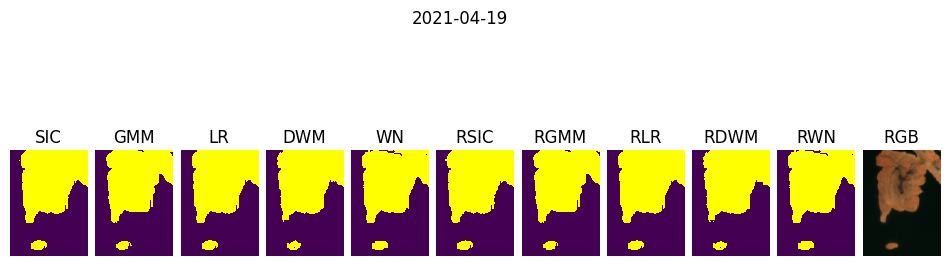

Image with index 19 from date 2021/05/04 (band 2)
Image with index 19 from date 2021/05/04 (band 3)
Image with index 19 from date 2021/05/04 (band 4)
Image with index 19 from date 2021/05/04 (band 8A)
Image with index 19 from date 2021/05/04 (band 8)
Image with index 19 from date 2021/05/04 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 11:34:08.685384: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 294ms/step
plotting results for image with index 19
Saving sensitivity results
{'GMM': 9322, 'LR': 8937, 'SIC': 8841, 'RGMM': 9305, 'RLR': 8915, 'RSIC': 8798}


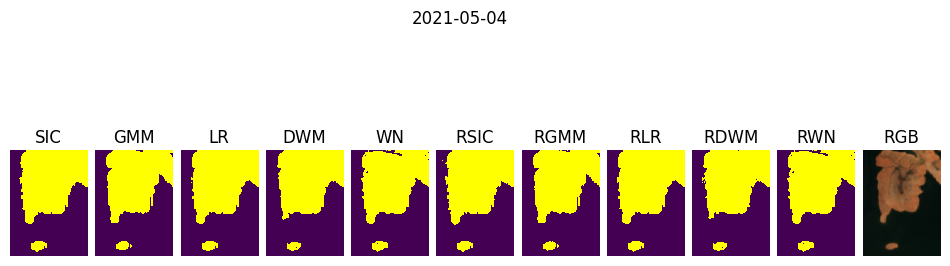

Image with index 20 from date 2021/05/14 (band 2)
Image with index 20 from date 2021/05/14 (band 3)
Image with index 20 from date 2021/05/14 (band 4)
Image with index 20 from date 2021/05/14 (band 8A)
Image with index 20 from date 2021/05/14 (band 8)
Image with index 20 from date 2021/05/14 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 11:34:27.476544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 311ms/step
plotting results for image with index 20
Saving sensitivity results
{'GMM': 8977, 'LR': 8538, 'SIC': 8399, 'RGMM': 8934, 'RLR': 8487, 'RSIC': 8308}


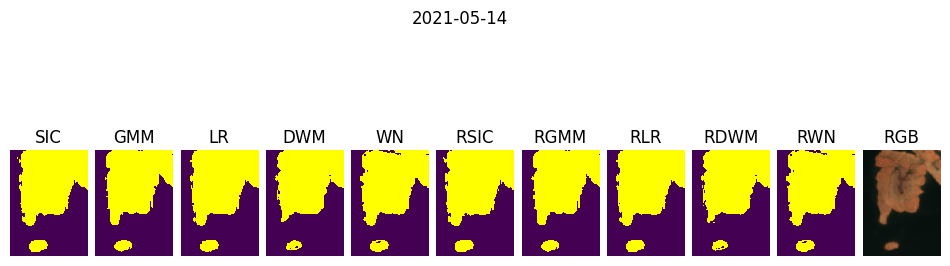

Image with index 21 from date 2021/05/19 (band 2)
Image with index 21 from date 2021/05/19 (band 3)
Image with index 21 from date 2021/05/19 (band 4)
Image with index 21 from date 2021/05/19 (band 8A)
Image with index 21 from date 2021/05/19 (band 8)
Image with index 21 from date 2021/05/19 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 11:34:46.194637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 305ms/step
plotting results for image with index 21
Saving sensitivity results
{'GMM': 8876, 'LR': 8337, 'SIC': 8262, 'RGMM': 8877, 'RLR': 8315, 'RSIC': 8169}


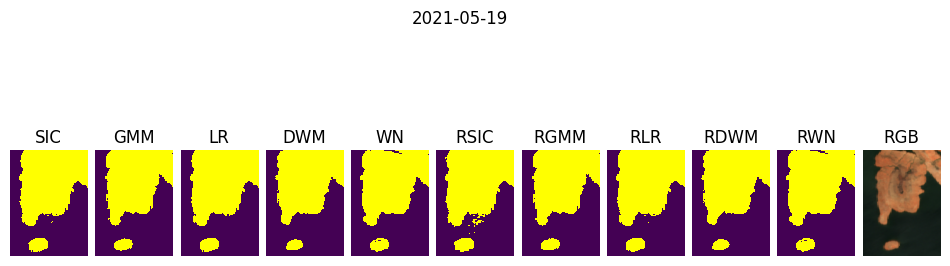

Image with index 22 from date 2021/05/29 (band 2)
Image with index 22 from date 2021/05/29 (band 3)
Image with index 22 from date 2021/05/29 (band 4)
Image with index 22 from date 2021/05/29 (band 8A)
Image with index 22 from date 2021/05/29 (band 8)
Image with index 22 from date 2021/05/29 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 11:35:05.015003: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 320ms/step
plotting results for image with index 22
Saving sensitivity results
{'GMM': 8528, 'LR': 7999, 'SIC': 7963, 'RGMM': 8493, 'RLR': 7968, 'RSIC': 7901}


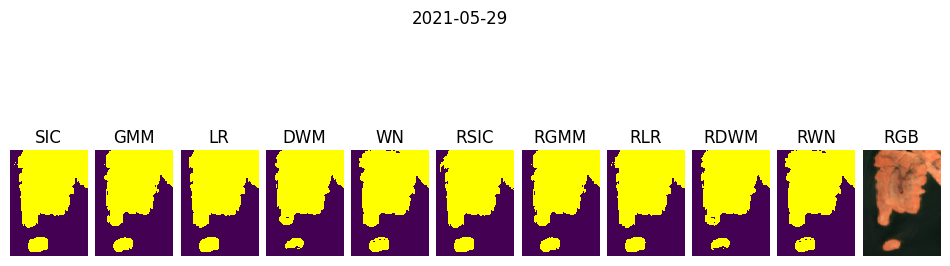

Image with index 23 from date 2021/06/03 (band 2)
Image with index 23 from date 2021/06/03 (band 3)
Image with index 23 from date 2021/06/03 (band 4)
Image with index 23 from date 2021/06/03 (band 8A)
Image with index 23 from date 2021/06/03 (band 8)
Image with index 23 from date 2021/06/03 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 11:35:23.724412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 308ms/step
plotting results for image with index 23
Saving sensitivity results
{'GMM': 8186, 'LR': 7868, 'SIC': 7845, 'RGMM': 8171, 'RLR': 7872, 'RSIC': 7842}


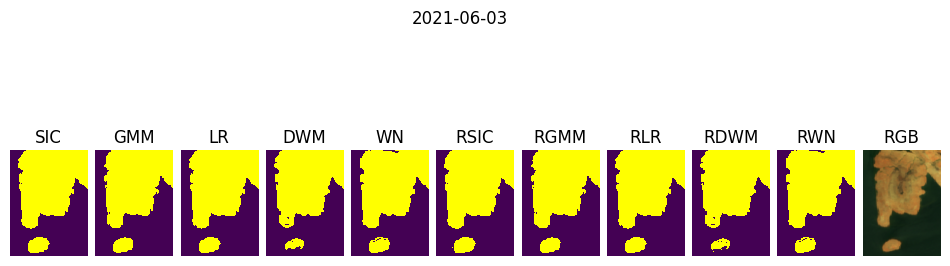

Image with index 24 from date 2021/06/08 (band 2)
Image with index 24 from date 2021/06/08 (band 3)
Image with index 24 from date 2021/06/08 (band 4)
Image with index 24 from date 2021/06/08 (band 8A)
Image with index 24 from date 2021/06/08 (band 8)
Image with index 24 from date 2021/06/08 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 11:35:42.570937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 276ms/step
plotting results for image with index 24
Saving sensitivity results
{'GMM': 8191, 'LR': 7779, 'SIC': 7795, 'RGMM': 8190, 'RLR': 7766, 'RSIC': 7715}


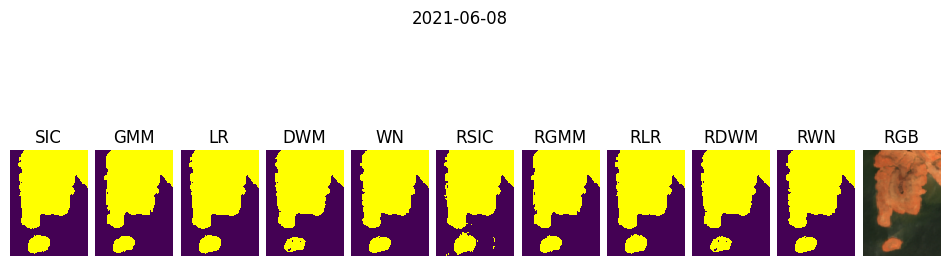

Image with index 25 from date 2021/06/13 (band 2)
Image with index 25 from date 2021/06/13 (band 3)
Image with index 25 from date 2021/06/13 (band 4)
Image with index 25 from date 2021/06/13 (band 8A)
Image with index 25 from date 2021/06/13 (band 8)
Image with index 25 from date 2021/06/13 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 11:36:01.189485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 323ms/step
plotting results for image with index 25
Saving sensitivity results
{'GMM': 7757, 'LR': 7411, 'SIC': 7409, 'RGMM': 7743, 'RLR': 7385, 'RSIC': 7374}


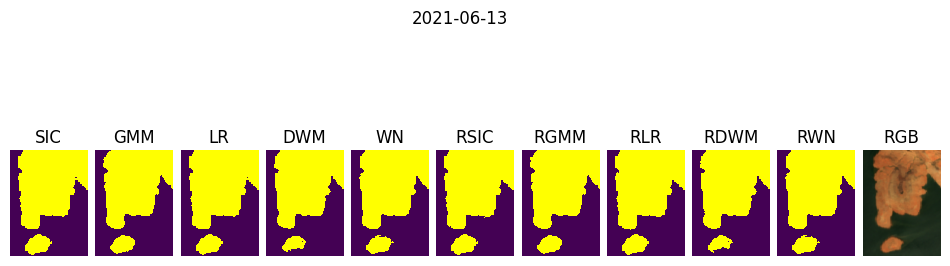

Image with index 26 from date 2021/06/18 (band 2)
Image with index 26 from date 2021/06/18 (band 3)
Image with index 26 from date 2021/06/18 (band 4)
Image with index 26 from date 2021/06/18 (band 8A)
Image with index 26 from date 2021/06/18 (band 8)
Image with index 26 from date 2021/06/18 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 11:36:19.714808: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 502ms/step
plotting results for image with index 26
Saving sensitivity results
{'GMM': 7764, 'LR': 7344, 'SIC': 7339, 'RGMM': 7774, 'RLR': 7337, 'RSIC': 7342}


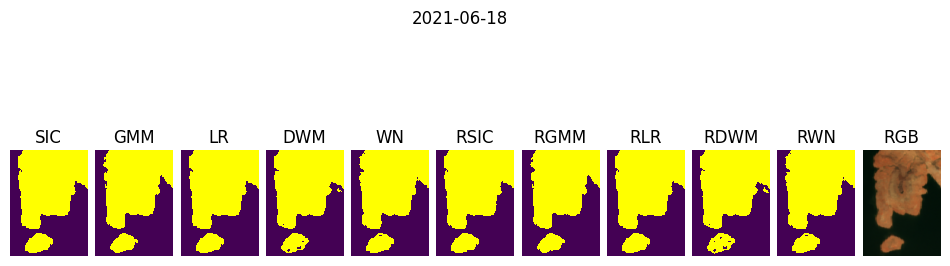

Image with index 27 from date 2021/06/23 (band 2)
Image with index 27 from date 2021/06/23 (band 3)
Image with index 27 from date 2021/06/23 (band 4)
Image with index 27 from date 2021/06/23 (band 8A)
Image with index 27 from date 2021/06/23 (band 8)
Image with index 27 from date 2021/06/23 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 11:36:38.777065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 309ms/step
plotting results for image with index 27
Saving sensitivity results
{'GMM': 7228, 'LR': 6872, 'SIC': 6870, 'RGMM': 7200, 'RLR': 6852, 'RSIC': 6753}


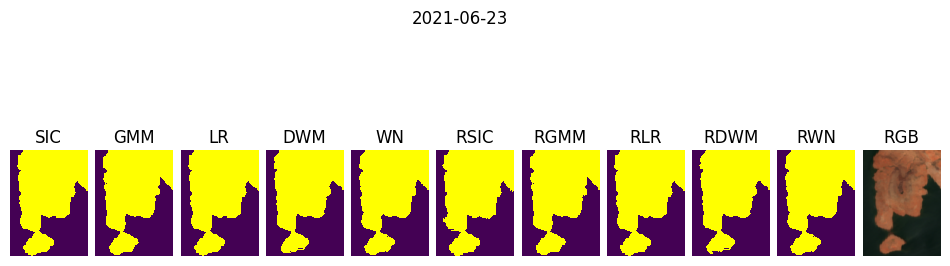

Image with index 28 from date 2021/06/28 (band 2)
Image with index 28 from date 2021/06/28 (band 3)
Image with index 28 from date 2021/06/28 (band 4)
Image with index 28 from date 2021/06/28 (band 8A)
Image with index 28 from date 2021/06/28 (band 8)
Image with index 28 from date 2021/06/28 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 11:36:57.466742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 291ms/step
plotting results for image with index 28
Saving sensitivity results
{'GMM': 7063, 'LR': 6670, 'SIC': 6701, 'RGMM': 7056, 'RLR': 6658, 'RSIC': 6688}


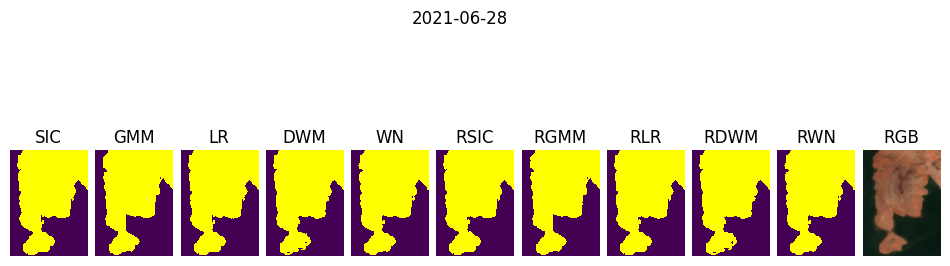

Image with index 29 from date 2021/07/08 (band 2)
Image with index 29 from date 2021/07/08 (band 3)
Image with index 29 from date 2021/07/08 (band 4)
Image with index 29 from date 2021/07/08 (band 8A)
Image with index 29 from date 2021/07/08 (band 8)
Image with index 29 from date 2021/07/08 (band 11)


2022-10-27 11:37:15.943572: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 295ms/step
plotting results for image with index 29
Saving sensitivity results
{'GMM': 6364, 'LR': 5962, 'SIC': 6005, 'RGMM': 6338, 'RLR': 5933, 'RSIC': 5914}


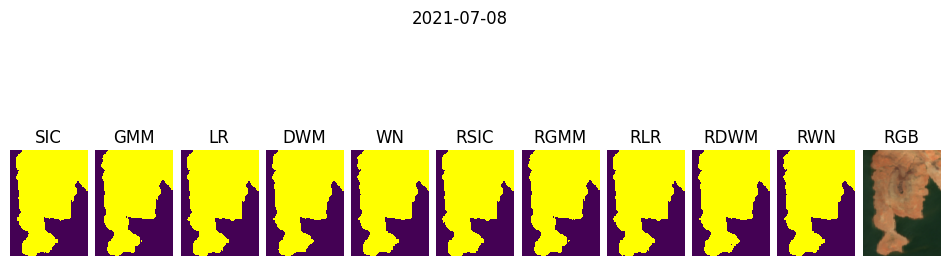

Image with index 30 from date 2021/07/13 (band 2)
Image with index 30 from date 2021/07/13 (band 3)
Image with index 30 from date 2021/07/13 (band 4)
Image with index 30 from date 2021/07/13 (band 8A)
Image with index 30 from date 2021/07/13 (band 8)
Image with index 30 from date 2021/07/13 (band 11)


2022-10-27 11:37:34.585382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 336ms/step
plotting results for image with index 30
Saving sensitivity results
{'GMM': 5926, 'LR': 5598, 'SIC': 5613, 'RGMM': 5904, 'RLR': 5587, 'RSIC': 5588}


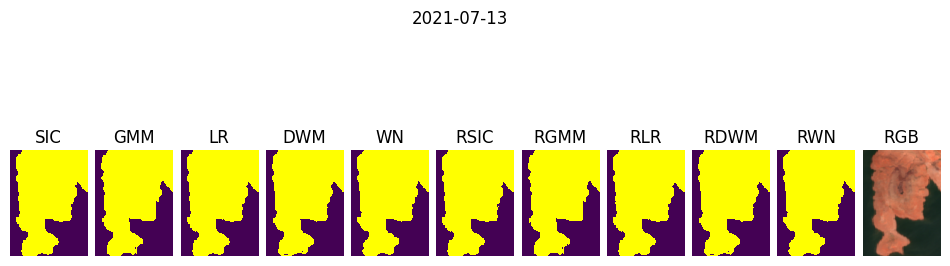

Image with index 31 from date 2021/07/18 (band 2)
Image with index 31 from date 2021/07/18 (band 3)
Image with index 31 from date 2021/07/18 (band 4)
Image with index 31 from date 2021/07/18 (band 8A)
Image with index 31 from date 2021/07/18 (band 8)
Image with index 31 from date 2021/07/18 (band 11)


2022-10-27 11:37:53.220740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 351ms/step
plotting results for image with index 31
Saving sensitivity results
{'GMM': 5702, 'LR': 5495, 'SIC': 5505, 'RGMM': 5692, 'RLR': 5494, 'RSIC': 5502}


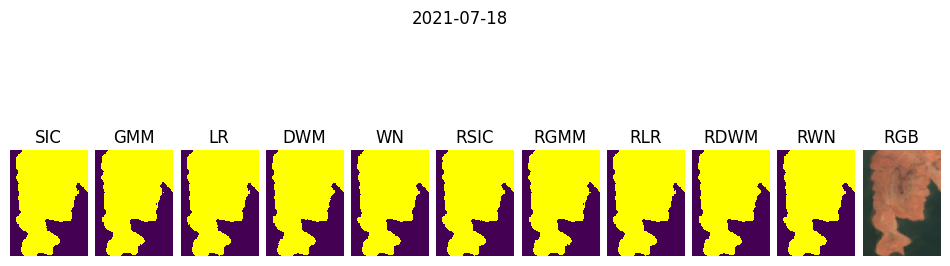

Image with index 32 from date 2021/07/23 (band 2)
Image with index 32 from date 2021/07/23 (band 3)
Image with index 32 from date 2021/07/23 (band 4)
Image with index 32 from date 2021/07/23 (band 8A)
Image with index 32 from date 2021/07/23 (band 8)
Image with index 32 from date 2021/07/23 (band 11)


2022-10-27 11:38:12.767147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 306ms/step
plotting results for image with index 32
Saving sensitivity results
{'GMM': 5271, 'LR': 5069, 'SIC': 5071, 'RGMM': 5256, 'RLR': 5055, 'RSIC': 5019}


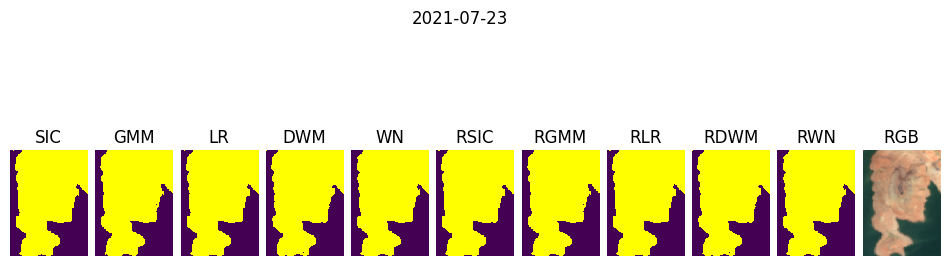

Image with index 33 from date 2021/08/02 (band 2)
Image with index 33 from date 2021/08/02 (band 3)
Image with index 33 from date 2021/08/02 (band 4)
Image with index 33 from date 2021/08/02 (band 8A)
Image with index 33 from date 2021/08/02 (band 8)
Image with index 33 from date 2021/08/02 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 11:38:32.057172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 340ms/step
plotting results for image with index 33
Saving sensitivity results
{'GMM': 4735, 'LR': 4428, 'SIC': 4418, 'RGMM': 4708, 'RLR': 4403, 'RSIC': 4360}


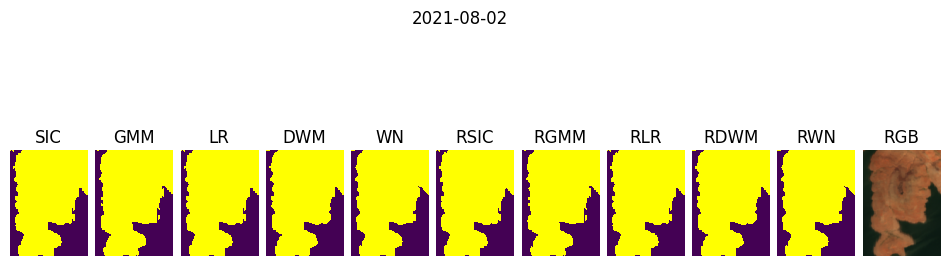

Image with index 34 from date 2021/08/22 (band 2)
Image with index 34 from date 2021/08/22 (band 3)
Image with index 34 from date 2021/08/22 (band 4)
Image with index 34 from date 2021/08/22 (band 8A)
Image with index 34 from date 2021/08/22 (band 8)
Image with index 34 from date 2021/08/22 (band 11)


2022-10-27 11:38:51.472858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 328ms/step
plotting results for image with index 34
Saving sensitivity results
{'GMM': 4283, 'LR': 4178, 'SIC': 4159, 'RGMM': 4246, 'RLR': 4168, 'RSIC': 4143}


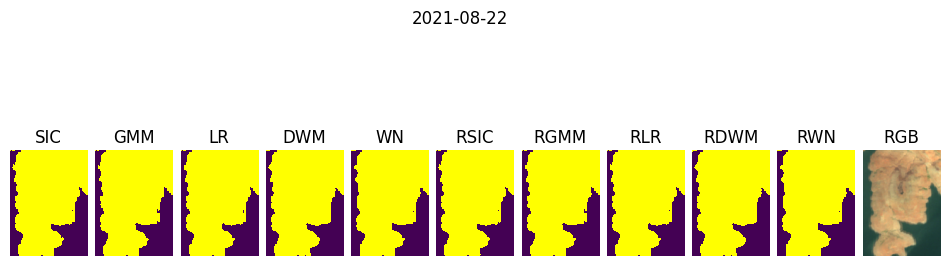

Image with index 35 from date 2021/08/27 (band 2)
Image with index 35 from date 2021/08/27 (band 3)
Image with index 35 from date 2021/08/27 (band 4)
Image with index 35 from date 2021/08/27 (band 8A)
Image with index 35 from date 2021/08/27 (band 8)
Image with index 35 from date 2021/08/27 (band 11)


2022-10-27 11:39:10.818414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 303ms/step
plotting results for image with index 35
Saving sensitivity results
{'GMM': 4496, 'LR': 4451, 'SIC': 4420, 'RGMM': 4512, 'RLR': 4454, 'RSIC': 4490}


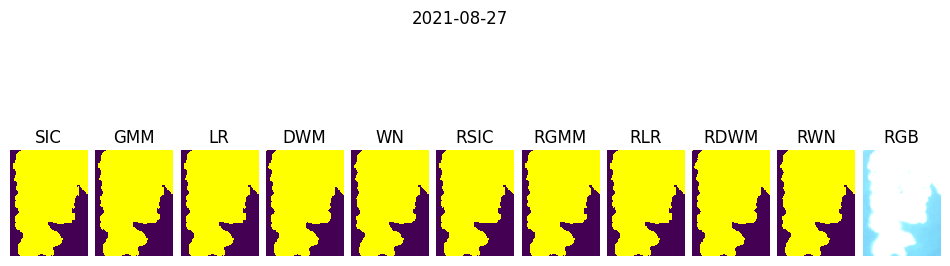

Image with index 36 from date 2021/09/01 (band 2)
Image with index 36 from date 2021/09/01 (band 3)
Image with index 36 from date 2021/09/01 (band 4)
Image with index 36 from date 2021/09/01 (band 8A)
Image with index 36 from date 2021/09/01 (band 8)
Image with index 36 from date 2021/09/01 (band 11)


2022-10-27 11:39:29.979550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 312ms/step
plotting results for image with index 36
Saving sensitivity results
{'GMM': 4197, 'LR': 3805, 'SIC': 3794, 'RGMM': 4168, 'RLR': 3776, 'RSIC': 3685}


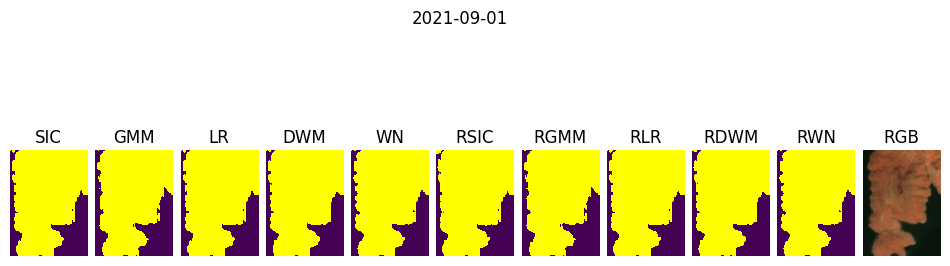

Image with index 37 from date 2021/09/06 (band 2)
Image with index 37 from date 2021/09/06 (band 3)
Image with index 37 from date 2021/09/06 (band 4)
Image with index 37 from date 2021/09/06 (band 8A)
Image with index 37 from date 2021/09/06 (band 8)
Image with index 37 from date 2021/09/06 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 11:39:48.800427: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 291ms/step
plotting results for image with index 37
Saving sensitivity results
{'GMM': 4230, 'LR': 3715, 'SIC': 3705, 'RGMM': 4237, 'RLR': 3698, 'RSIC': 3713}


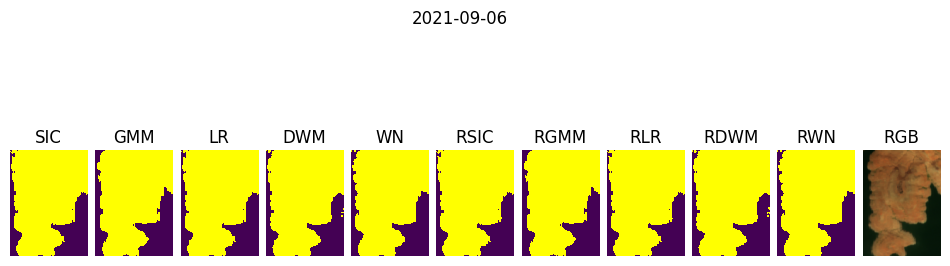

Image with index 38 from date 2021/09/11 (band 2)
Image with index 38 from date 2021/09/11 (band 3)
Image with index 38 from date 2021/09/11 (band 4)
Image with index 38 from date 2021/09/11 (band 8A)
Image with index 38 from date 2021/09/11 (band 8)
Image with index 38 from date 2021/09/11 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 11:40:07.809419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 326ms/step
plotting results for image with index 38
Saving sensitivity results
{'GMM': 4170, 'LR': 3817, 'SIC': 3810, 'RGMM': 4170, 'RLR': 3833, 'RSIC': 3834}


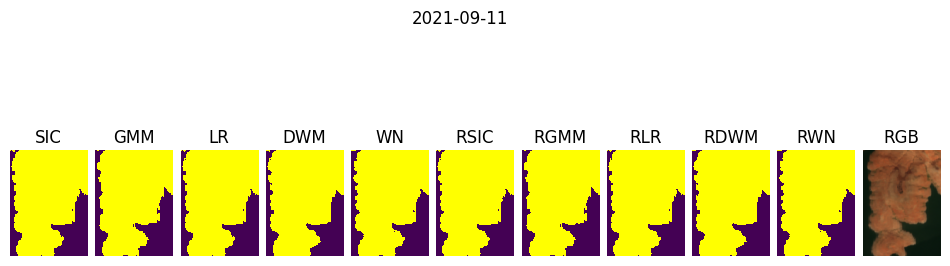

Image with index 39 from date 2021/09/16 (band 2)
Image with index 39 from date 2021/09/16 (band 3)
Image with index 39 from date 2021/09/16 (band 4)
Image with index 39 from date 2021/09/16 (band 8A)
Image with index 39 from date 2021/09/16 (band 8)
Image with index 39 from date 2021/09/16 (band 11)


2022-10-27 11:40:27.369312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 326ms/step
plotting results for image with index 39
Saving sensitivity results
{'GMM': 4196, 'LR': 3898, 'SIC': 3900, 'RGMM': 4212, 'RLR': 3906, 'RSIC': 3921}


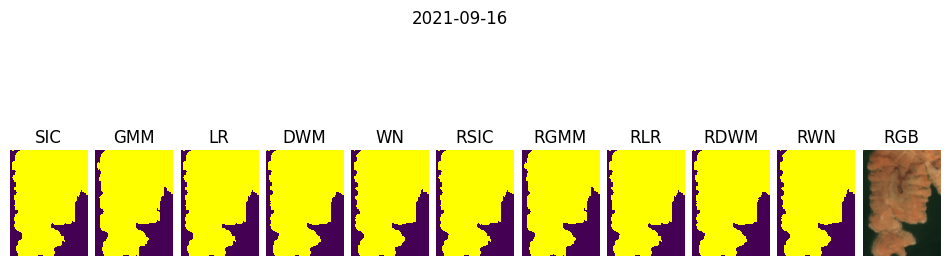

Image with index 40 from date 2021/09/21 (band 2)
Image with index 40 from date 2021/09/21 (band 3)
Image with index 40 from date 2021/09/21 (band 4)
Image with index 40 from date 2021/09/21 (band 8A)
Image with index 40 from date 2021/09/21 (band 8)
Image with index 40 from date 2021/09/21 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))


2022-10-27 11:40:46.317941: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 339ms/step
plotting results for image with index 40
Saving sensitivity results
{'GMM': 4023, 'LR': 3866, 'SIC': 3830, 'RGMM': 3992, 'RLR': 3864, 'RSIC': 3815}


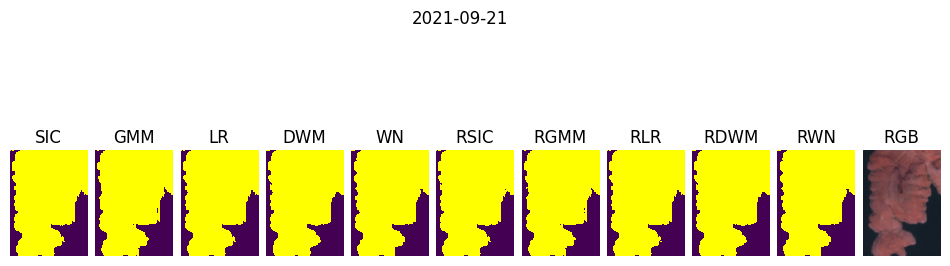

Image with index 41 from date 2021/09/26 (band 2)
Image with index 41 from date 2021/09/26 (band 3)
Image with index 41 from date 2021/09/26 (band 4)
Image with index 41 from date 2021/09/26 (band 8A)
Image with index 41 from date 2021/09/26 (band 8)
Image with index 41 from date 2021/09/26 (band 11)


/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])
/Users/helena/PycharmProjects/RBC-SatImg/bayesian_recursive.py:212: RuntimeWarning: invalid value encountered in divide
  y_pred = np.divide(y_pred, sum_den.reshape(self.total_num_pixels, 1))
/Users/helena/PycharmProjects/RBC-SatImg/tools/spectral_index.py:146: RuntimeWarning: invalid value encountered in divide
  index = (data[:, pos_band_1] - data[:, pos_band_2]) / (data[:, pos_band_1] + data[:, pos_band_2])


2022-10-27 11:41:05.479316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 503ms/step
plotting results for image with index 41
Saving sensitivity results
{'GMM': 4111, 'LR': 3570, 'SIC': 3547, 'RGMM': 4121, 'RLR': 3530, 'RSIC': 3503}


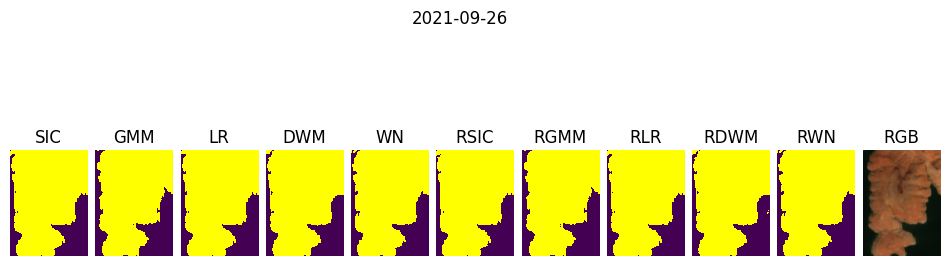

In [7]:
# Evaluation Stage
# scene_id = 2 for scene B in Oroville Dam (peninsula)
Config.scene_id = 2

# Debug
'''
import numpy as np
Config.eps = 0.6
eps=Config.eps
Config.transition_matrix = {'oroville_dam':  np.array([1 - eps, eps, eps, 1 - eps]).reshape(2, 2), 'charles_river':np.array([1 - eps, eps, eps, eps,1 - eps,eps,eps,eps,1-eps]).reshape(3,3)}
from configuration import Config
print(Config.eps)
print(Config.transition_matrix)
'''

# This stage includes the plotting of results
evaluation_main(gmm_densities, trained_lr_model, image_reader)

## Land Cover Classification
![Study Area Land Cover Classification](figures/study_area_land_use_land_cover.png)

In [4]:
# Configure the scenario
Config.scenario = "charles_river"

# Initialize random seed
random.seed(1)

# Set logging path
Debug.set_logging_file(time_now=datetime.now())

# Instance of Image Reader object
image_reader = ReadSentinel2(Config.image_dimensions[Config.scenario]['dim_x'],
                             Config.image_dimensions[Config.scenario]['dim_y'])

### Training (Study Region 2)

In [5]:
# Training Stage
labels, gmm_densities, trained_lr_model = training_main(image_reader)

Image with index 0 from date 2020/09/04 (band 2)
Image with index 0 from date 2020/09/04 (band 3)
Image with index 0 from date 2020/09/04 (band 4)
Image with index 0 from date 2020/09/04 (band 8A)
Image with index 0 from date 2020/09/04 (band 8)
Image with index 0 from date 2020/09/04 (band 11)
Image with index 1 from date 2020/10/01 (band 2)
Image with index 1 from date 2020/10/01 (band 3)
Image with index 1 from date 2020/10/01 (band 4)
Image with index 1 from date 2020/10/01 (band 8A)
Image with index 1 from date 2020/10/01 (band 8)
Image with index 1 from date 2020/10/01 (band 11)
Image with index 2 from date 2020/10/09 (band 2)
Image with index 2 from date 2020/10/09 (band 3)
Image with index 2 from date 2020/10/09 (band 4)
Image with index 2 from date 2020/10/09 (band 8A)
Image with index 2 from date 2020/10/09 (band 8)
Image with index 2 from date 2020/10/09 (band 11)


### Evaluation (Study Area C)

model name GMM and transition probability matrix is [[0.9 0.1 0.1]
 [0.1 0.9 0.1]
 [0.1 0.1 0.9]]
model name Scaled Index and transition probability matrix is [[0.9 0.1 0.1]
 [0.1 0.9 0.1]
 [0.1 0.1 0.9]]
model name Logistic Regression and transition probability matrix is [[0.9 0.1 0.1]
 [0.1 0.9 0.1]
 [0.1 0.1 0.9]]
Image with index 0 from date 2020/10/14 (band 2)
Image with index 0 from date 2020/10/14 (band 3)
Image with index 0 from date 2020/10/14 (band 4)
Image with index 0 from date 2020/10/14 (band 8A)
Image with index 0 from date 2020/10/14 (band 8)
Image with index 0 from date 2020/10/14 (band 11)
plotting results for image with index 0


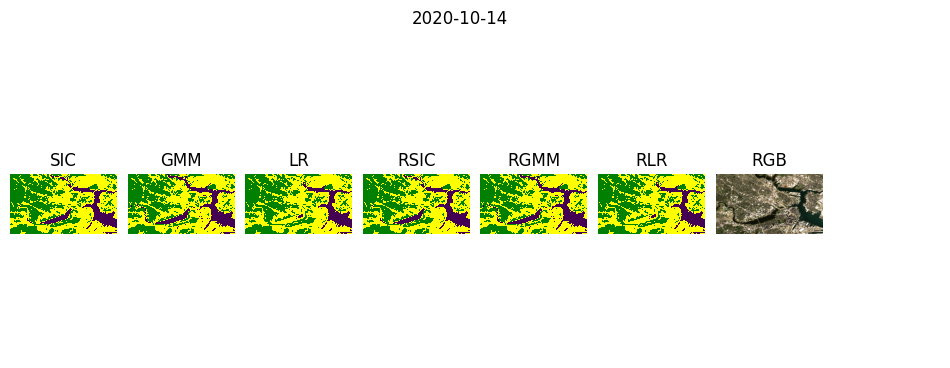

Image with index 1 from date 2020/11/08 (band 2)
Image with index 1 from date 2020/11/08 (band 3)
Image with index 1 from date 2020/11/08 (band 4)
Image with index 1 from date 2020/11/08 (band 8A)
Image with index 1 from date 2020/11/08 (band 8)
Image with index 1 from date 2020/11/08 (band 11)
plotting results for image with index 1


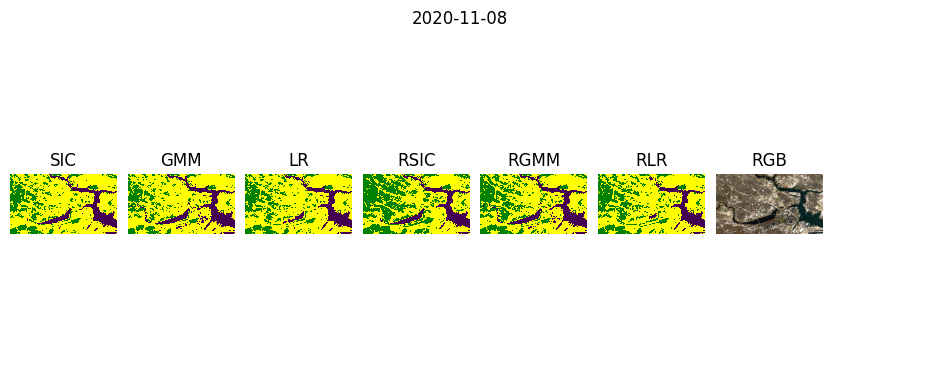

Image with index 2 from date 2020/11/10 (band 2)
Image with index 2 from date 2020/11/10 (band 3)
Image with index 2 from date 2020/11/10 (band 4)
Image with index 2 from date 2020/11/10 (band 8A)
Image with index 2 from date 2020/11/10 (band 8)
Image with index 2 from date 2020/11/10 (band 11)
plotting results for image with index 2


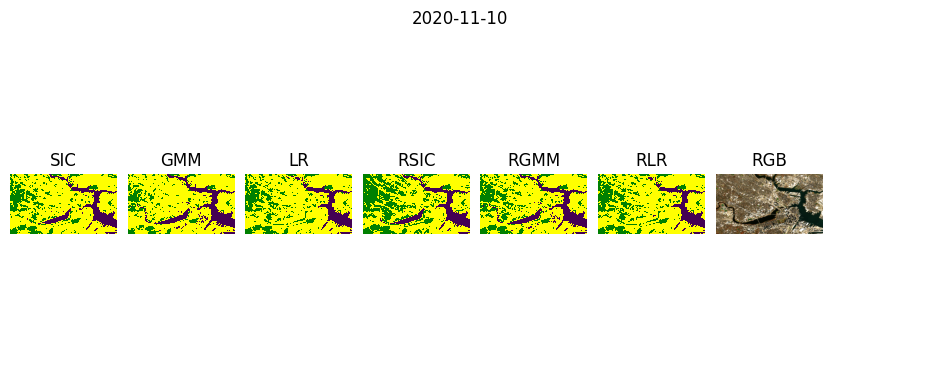

Image with index 3 from date 2020/11/18 (band 2)
Image with index 3 from date 2020/11/18 (band 3)
Image with index 3 from date 2020/11/18 (band 4)
Image with index 3 from date 2020/11/18 (band 8A)
Image with index 3 from date 2020/11/18 (band 8)
Image with index 3 from date 2020/11/18 (band 11)
plotting results for image with index 3


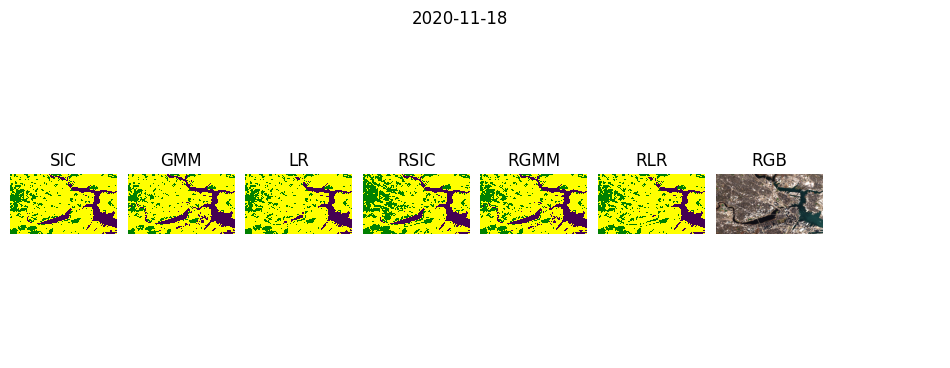

Image with index 4 from date 2020/12/03 (band 2)
Image with index 4 from date 2020/12/03 (band 3)
Image with index 4 from date 2020/12/03 (band 4)
Image with index 4 from date 2020/12/03 (band 8A)
Image with index 4 from date 2020/12/03 (band 8)
Image with index 4 from date 2020/12/03 (band 11)
plotting results for image with index 4


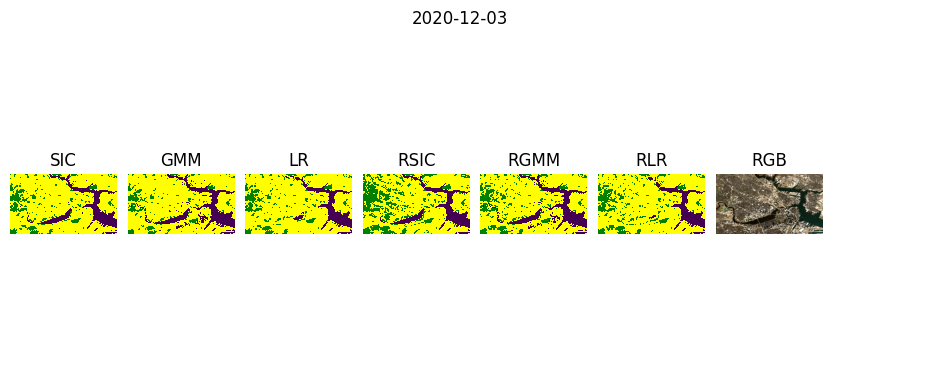

Image with index 5 from date 2020/12/13 (band 2)
Image with index 5 from date 2020/12/13 (band 3)
Image with index 5 from date 2020/12/13 (band 4)
Image with index 5 from date 2020/12/13 (band 8A)
Image with index 5 from date 2020/12/13 (band 8)
Image with index 5 from date 2020/12/13 (band 11)
plotting results for image with index 5


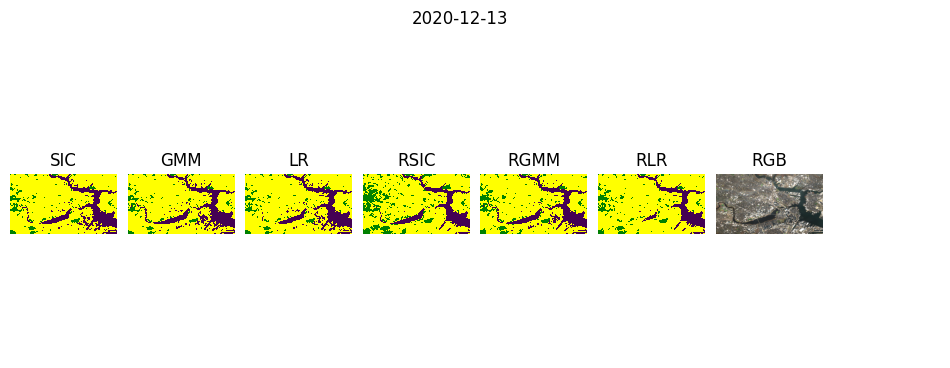

Image with index 6 from date 2020/12/15 (band 2)
Image with index 6 from date 2020/12/15 (band 3)
Image with index 6 from date 2020/12/15 (band 4)
Image with index 6 from date 2020/12/15 (band 8A)
Image with index 6 from date 2020/12/15 (band 8)
Image with index 6 from date 2020/12/15 (band 11)
plotting results for image with index 6


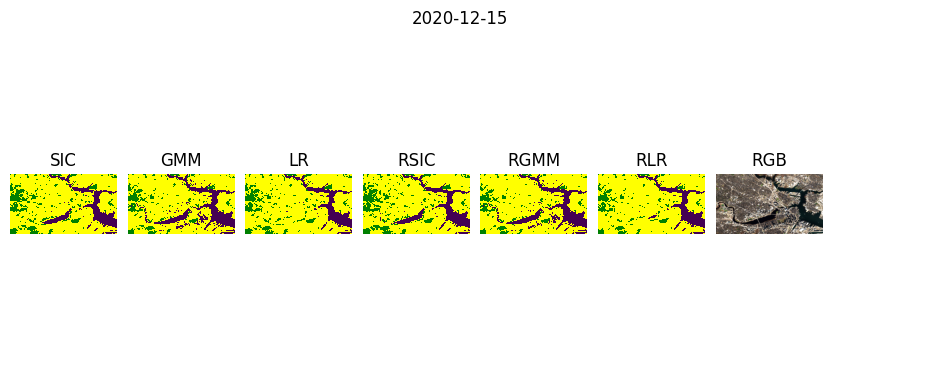

Image with index 7 from date 2021/01/24 (band 2)
Image with index 7 from date 2021/01/24 (band 3)
Image with index 7 from date 2021/01/24 (band 4)
Image with index 7 from date 2021/01/24 (band 8A)
Image with index 7 from date 2021/01/24 (band 8)
Image with index 7 from date 2021/01/24 (band 11)
plotting results for image with index 7


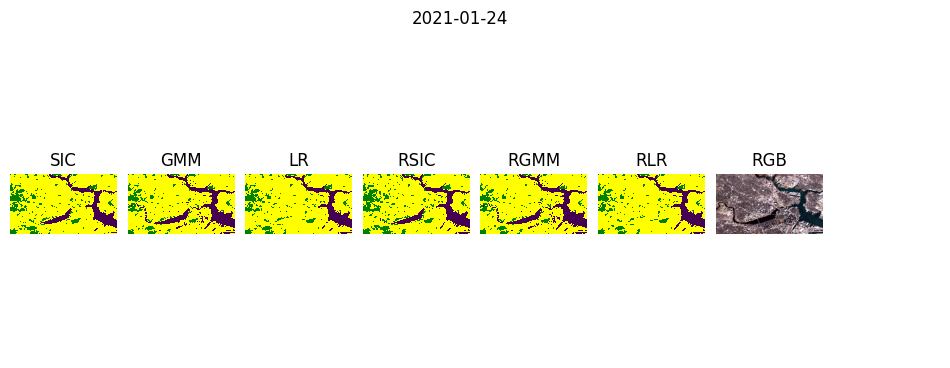

Image with index 8 from date 2021/03/13 (band 2)
Image with index 8 from date 2021/03/13 (band 3)
Image with index 8 from date 2021/03/13 (band 4)
Image with index 8 from date 2021/03/13 (band 8A)
Image with index 8 from date 2021/03/13 (band 8)
Image with index 8 from date 2021/03/13 (band 11)
plotting results for image with index 8


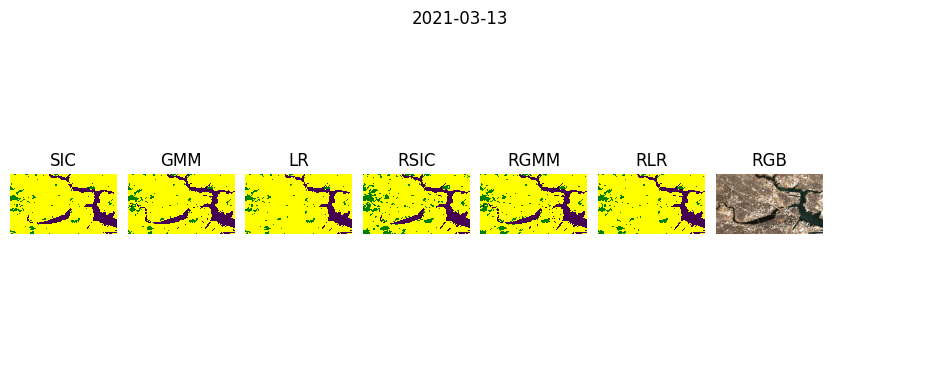

Image with index 9 from date 2021/03/20 (band 2)
Image with index 9 from date 2021/03/20 (band 3)
Image with index 9 from date 2021/03/20 (band 4)
Image with index 9 from date 2021/03/20 (band 8A)
Image with index 9 from date 2021/03/20 (band 8)
Image with index 9 from date 2021/03/20 (band 11)
plotting results for image with index 9


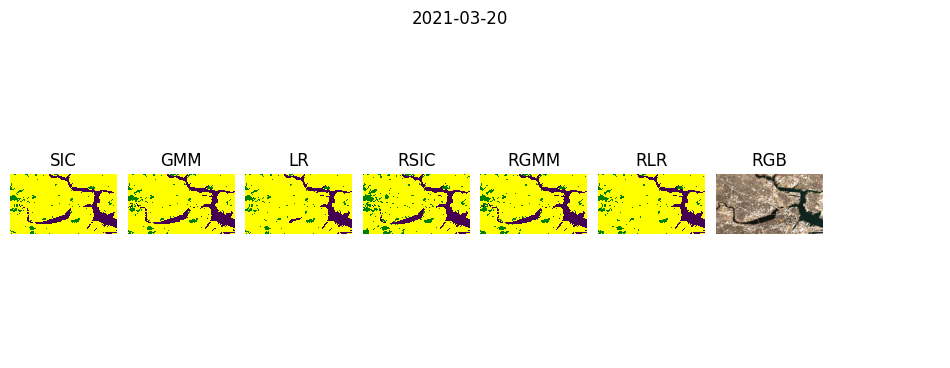

Image with index 10 from date 2021/03/23 (band 2)
Image with index 10 from date 2021/03/23 (band 3)
Image with index 10 from date 2021/03/23 (band 4)
Image with index 10 from date 2021/03/23 (band 8A)
Image with index 10 from date 2021/03/23 (band 8)
Image with index 10 from date 2021/03/23 (band 11)
plotting results for image with index 10


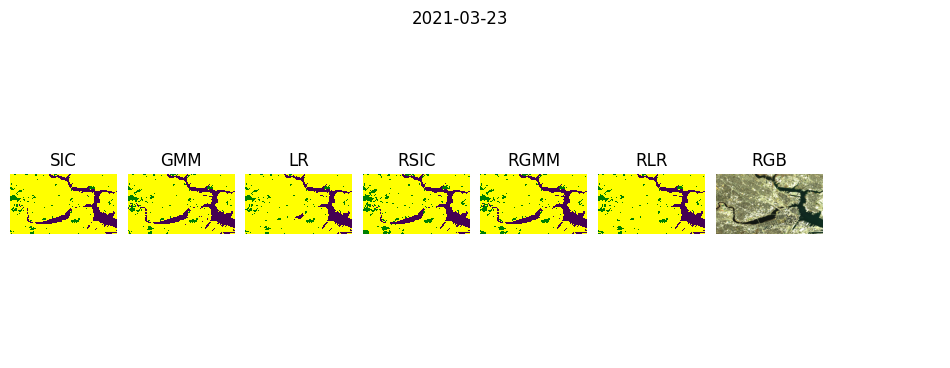

Image with index 11 from date 2021/03/30 (band 2)
Image with index 11 from date 2021/03/30 (band 3)
Image with index 11 from date 2021/03/30 (band 4)
Image with index 11 from date 2021/03/30 (band 8A)
Image with index 11 from date 2021/03/30 (band 8)
Image with index 11 from date 2021/03/30 (band 11)
plotting results for image with index 11


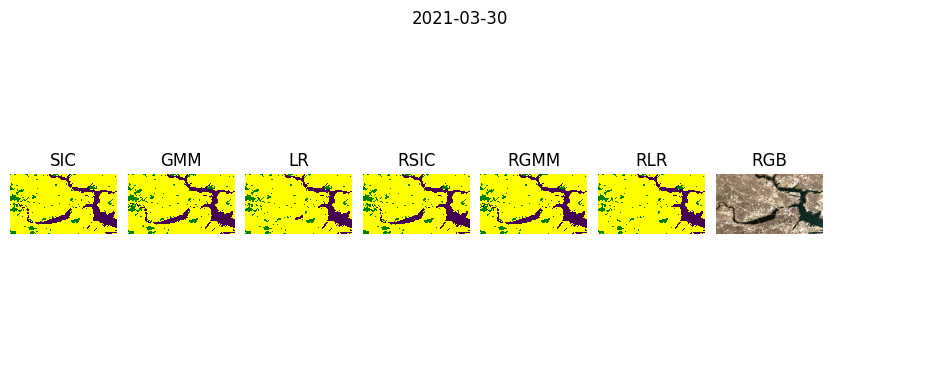

Image with index 12 from date 2021/04/04 (band 2)
Image with index 12 from date 2021/04/04 (band 3)
Image with index 12 from date 2021/04/04 (band 4)
Image with index 12 from date 2021/04/04 (band 8A)
Image with index 12 from date 2021/04/04 (band 8)
Image with index 12 from date 2021/04/04 (band 11)
plotting results for image with index 12


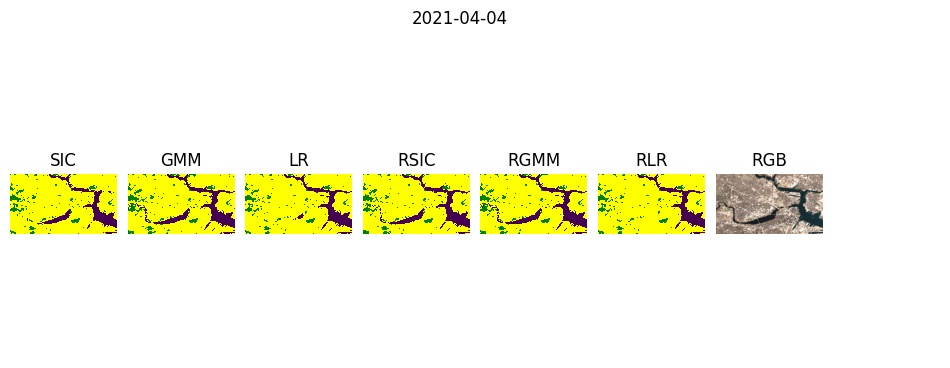

Image with index 13 from date 2021/04/24 (band 2)
Image with index 13 from date 2021/04/24 (band 3)
Image with index 13 from date 2021/04/24 (band 4)
Image with index 13 from date 2021/04/24 (band 8A)
Image with index 13 from date 2021/04/24 (band 8)
Image with index 13 from date 2021/04/24 (band 11)
plotting results for image with index 13


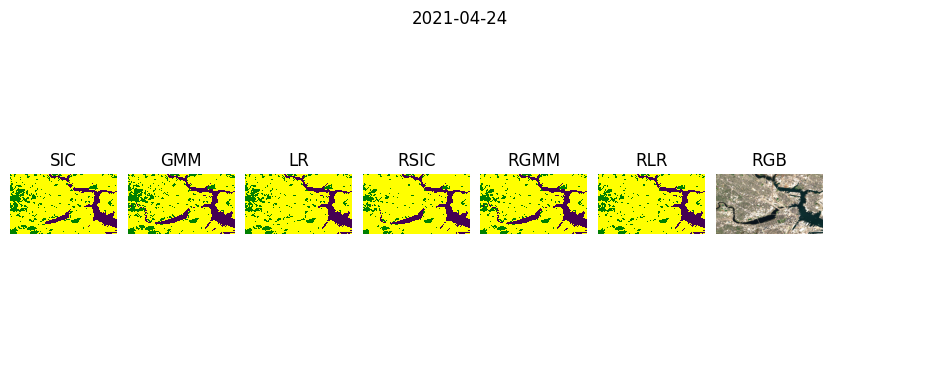

Image with index 14 from date 2021/05/14 (band 2)
Image with index 14 from date 2021/05/14 (band 3)
Image with index 14 from date 2021/05/14 (band 4)
Image with index 14 from date 2021/05/14 (band 8A)
Image with index 14 from date 2021/05/14 (band 8)
Image with index 14 from date 2021/05/14 (band 11)


In [ ]:
# Evaluation Stage
# scene_id = 3 for scene C (Charles River)
Config.scene_id = 3

# This stage includes the plotting of results
evaluation_main(gmm_densities, trained_lr_model, image_reader)

## Authors
* Bhavya Duvvuri, from The Beighley Lab (Sustainable Water Resources | Resilient Wet Infrastructure) at Northeastern
University, Boston (MA).
* Helena Calatrava, from the Signal Processing, Imaging, Reasoning and Learning (SPIRAL) Group also at 
Northeastern University, Boston (MA). 
